# Step4: Comparison with a published organoid (Garcia-Alonso et al.)

In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(SeuratDisk)
    #library(SeuratData)
    library(patchwork)
    library(ggplot2)
    library(cowplot)
    #theme_set(theme_cowplot())
    library(Matrix)
    library(SCP)
    #library(SeuratWrappers)
    library(dplyr)
    #library(reticulate)
    #library(MAST)
    #library(velocyto.R)
    #library(monocle3)
    #library(magrittr)
    library(RColorBrewer)
})
options(warn=-1)

set.seed(23)

setwd("/work3/SingleCell/Arima")
options(stringsAsFactors = F)
source("src/functions_nagai.R")

In [2]:
color_palette1 <- brewer.pal(7, "Dark2")
color_palette2 <- brewer.pal(12, "Paired")
color_palette <- c(color_palette1, color_palette2)
color_palette
length(color_palette)

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"
 [8] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F"
[15] "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"

[1] 19

In [24]:
color_palette1 <- brewer.pal(8, "Dark2")
color_palette2 <- brewer.pal(12, "Paired")
color_palette <- c(color_palette1, color_palette2)
color_palette
length(color_palette)

final_color_palette <- c('#1B9E77','#D95F02','#7570B3',
                         '#E7298A','#66A61E','#E6AB02',
                         '#A6761D','#666666','#A6CEE3',
                         '#1F78B4','#B2DF8A','#33A02C',
                         '#FB9A99','#E31A1C','#FDBF6F',
                         '#FF7F00','#CAB2D6','#6A3D9A',
                         '#FFFF99','#B15928')

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"
 [8] "#666666" "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C"
[15] "#FDBF6F" "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"

[1] 20

In [4]:
#load arima
ari_org_integrated <- readRDS("data/ari_org/ari_org_annotated.rds")
ari_org_integrated$project <- "ari_org"

In [5]:
ari_org_integrated
head(ari_org_integrated@meta.data)

An object of class Seurat 
81018 features across 17537 samples within 3 assays 
Active assay: SCT (27533 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, umap, tsne

orig.ident     nCount_RNA nFeature_RNA percent_mt
AAACCCAAGAACCCGA-1_1 Arima_Pre1_con 8096       3786         0.04940711
AAACCCAAGACATCAA-1_1 Arima_Pre1_con 6645       3199         0.01504891
AAACCCAAGCGACCCT-1_1 Arima_Pre1_con 8680       4231         0.00000000
AAACCCACAACGCCCA-1_1 Arima_Pre1_con 3434       2203         0.02912056
AAACCCACATACCAGT-1_1 Arima_Pre1_con 7236       3560         0.00000000
AAACCCACATGGTACT-1_1 Arima_Pre1_con 6897       3404         0.05799623
                     percent_rb nUMI S.Score     G2M.Score    Phase
AAACCCAAGAACCCGA-1_1 0          8096 -0.01967306  0.002771246 G2M  
AAACCCAAGACATCAA-1_1 0          6645 -0.08207534 -0.144767290 G1   
AAACCCAAGCGACCCT-1_1 0          8680 -0.24895522 -0.045133057 G1   
AAACCCACAACGCCCA-1_1 0          3434 -0.08238806 -0.034318665 G1   
AAACCCACATACCAGT-1_1 0          7236 -0.13692964  0.007138058 G2M  
AAACCCACATGGTACT-1_1 0          6897 -0.06065387  0.014416079 G2M  
                     old.ident      ⋯ integrated_snn_res.0.6
AAACCCAAGAACCCGA-1_1 Arima_Pre1_con ⋯ 8                     
AAACCCAAGACATCAA-1_1 Arima_Pre1_con ⋯ 3                     
AAACCCAAGCGACCCT-1_1 Arima_Pre1_con ⋯ 3                     
AAACCCACAACGCCCA-1_1 Arima_Pre1_con ⋯ 1                     
AAACCCACATACCAGT-1_1 Arima_Pre1_con ⋯ 2                     
AAACCCACATGGTACT-1_1 Arima_Pre1_con ⋯ 0                     
                     integrated_snn_res.0.7 integrated_snn_res.0.8
AAACCCAAGAACCCGA-1_1 9                      11                    
AAACCCAAGACATCAA-1_1 3                      3                     
AAACCCAAGCGACCCT-1_1 3                      3                     
AAACCCACAACGCCCA-1_1 1                      0                     
AAACCCACATACCAGT-1_1 6                      7                     
AAACCCACATGGTACT-1_1 0                      0                     
                     integrated_snn_res.0.9 integrated_snn_res.1
AAACCCAAGAACCCGA-1_1 12                     13                  
AAACCCAAGACATCAA-1_1 3                      2                   
AAACCCAAGCGACCCT-1_1 3                      2                   
AAACCCACAACGCCCA-1_1 0                      0                   
AAACCCACATACCAGT-1_1 10                     11                  
AAACCCACATGGTACT-1_1 0                      0                   
                     seurat_clusters clusters sample         project celltype
AAACCCAAGAACCCGA-1_1 13              9        Arima_Pre1_con ari_org Ciliated
AAACCCAAGACATCAA-1_1 2               3        Arima_Pre1_con ari_org Stromal 
AAACCCAAGCGACCCT-1_1 2               3        Arima_Pre1_con ari_org Stromal 
AAACCCACAACGCCCA-1_1 0               1        Arima_Pre1_con ari_org LGR5+   
AAACCCACATACCAGT-1_1 11              6        Arima_Pre1_con ari_org Luminal 
AAACCCACATGGTACT-1_1 0               0        Arima_Pre1_con ari_org NH

In [7]:
# cells annotated
table(ari_org_integrated$celltype)


           NH         LGR5+       Surface       Stromal     Glandular 
         4009          2389          2710          1657          1654 
      PV-like       Luminal Proliferative      Ciliated            10 
         1387          1262           816           682           426 
         Endo            13 
          336           209 

#### 3. Garcia-Alonso et al., organoid dataset

In [8]:
#load Garcia-Alonso in vitro
ga_org.downsized <- readRDS(file = "data/ga_org/processed/ga_org.downsized.rds")
ga_org.downsized
ga_org.downsized$project <- "ga_org"
ga_org.downsized$celltype <- ga_org.downsized$Celltype
head(ga_org.downsized@meta.data)

An object of class Seurat 
27254 features across 17537 samples within 1 assay 
Active assay: RNA (27254 features, 0 variable features)
 2 dimensional reductions calculated: umap, umap_without_inhibitors

demultiplexed sample_names    log2p1_count
WSSS_END9397528_GTCGAATGTCCAGAAG B44           WSSS_END9397528 12.69870    
WSSS_END9397535_GTCGTAACATGACAAA B44           WSSS_END9397535 13.27263    
WSSS_END9397520_GATCACAAGGTAGCAC U2            WSSS_END9397520 12.64047    
WSSS_END9397533_AGAGAATGTTACTCAG U1            WSSS_END9397533 13.03153    
WSSS_END9397531_TCGGGCAGTCAAGGCA B44           WSSS_END9397531 12.69436    
WSSS_END9397523_AACCCAAGTGAGGATC U1            WSSS_END9397523 14.35308    
                                 percent_mito n_genes Days Hormones Inhibitor
WSSS_END9397528_GTCGAATGTCCAGAAG 0.12968257   2189    6    Ctrl     Ctrl     
WSSS_END9397535_GTCGTAACATGACAAA 0.12764022   2952    6    E+P      WNT-XAV  
WSSS_END9397520_GATCACAAGGTAGCAC 0.11889098   2217    0    Ctrl     Ctrl     
WSSS_END9397533_AGAGAATGTTACTCAG 0.11741520   2520    6    E+P      Ctrl     
WSSS_END9397531_TCGGGCAGTCAAGGCA 0.11951109   2227    6    E+P      WNT-XAV  
WSSS_END9397523_AACCCAAGTGAGGATC 0.07215904   4770    2    E        NOTCH-DBZ
                                 IsClonal Celltype_without_inhibitors
WSSS_END9397528_GTCGAATGTCCAGAAG FALSE    NH_Day6                    
WSSS_END9397535_GTCGTAACATGACAAA FALSE    filtered                   
WSSS_END9397520_GATCACAAGGTAGCAC FALSE    NH_Day0                    
WSSS_END9397533_AGAGAATGTTACTCAG FALSE    Secretory                  
WSSS_END9397531_TCGGGCAGTCAAGGCA FALSE    filtered                   
WSSS_END9397523_AACCCAAGTGAGGATC FALSE    filtered                   
                                 Celltype              CellCycle.Phase project
WSSS_END9397528_GTCGAATGTCCAGAAG NH_d2_d6              G1              ga_org 
WSSS_END9397535_GTCGTAACATGACAAA Secretory_WNTi        G1              ga_org 
WSSS_END9397520_GATCACAAGGTAGCAC NH_d0                 G1              ga_org 
WSSS_END9397533_AGAGAATGTTACTCAG Secretory_Ctrl        G1              ga_org 
WSSS_END9397531_TCGGGCAGTCAAGGCA Estrogen_induced_PGR+ G1              ga_org 
WSSS_END9397523_AACCCAAGTGAGGATC Pre-ciliated          G1              ga_org 
                                 nCount_RNA nFeature_RNA celltype             
WSSS_END9397528_GTCGAATGTCCAGAAG  6647      2189         NH_d2_d6             
WSSS_END9397535_GTCGTAACATGACAAA  9895      2952         Secretory_WNTi       
WSSS_END9397520_GATCACAAGGTAGCAC  6384      2217         NH_d0                
WSSS_END9397533_AGAGAATGTTACTCAG  8372      2520         Secretory_Ctrl       
WSSS_END9397531_TCGGGCAGTCAAGGCA  6627      2227         Estrogen_induced_PGR+
WSSS_END9397523_AACCCAAGTGAGGATC 20926      4770         Pre-ciliated

In [9]:
print(paste0("Number of cells in this experiment: ", ncol(x = ga_org.downsized)))
print(paste0("Number of features identified: ", nrow(x = ga_org.downsized)))

[1] "Number of cells in this experiment: 17537"
[1] "Number of features identified: 27254"


### Integration of all samples

In [10]:
# list of all projects to integrate
so.list <- c(ari_org_integrated, ga_org.downsized)

In [11]:
# normalize and identify variable features for each dataset independently
so.list <- lapply(X = so.list, FUN = SCTransform)
features <- SelectIntegrationFeatures(object.list = so.list, nfeatures = 3000)
so.list <- PrepSCTIntegration(object.list = so.list, anchor.features = features)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 28103 by 17537

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


There are 1 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 69 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 28103 genes



  |======================================================================| 100%


Computing corrected count matrix for 28103 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.860252 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 21678 by 17537

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 116 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 21678 genes



  |======================================================================| 100%


Computing corrected count matrix for 21678 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.551295 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



In [12]:
so.anchors <- FindIntegrationAnchors(object.list = so.list, normalization.method = "SCT",
    anchor.features = features)
so.combined.sct <- IntegrateData(anchorset = so.anchors, normalization.method = "SCT")

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 25486 anchors

Filtering anchors

	Retained 11813 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [13]:
DefaultAssay(so.combined.sct) <- "integrated"

In [14]:
so.combined.sct <- RunPCA(so.combined.sct, verbose = FALSE)
so.combined.sct <- RunTSNE(so.combined.sct)
so.combined.sct <- RunUMAP(so.combined.sct, reduction = "pca", dims = 1:30)

13:38:09 UMAP embedding parameters a = 0.9922 b = 1.112

13:38:09 Read 35074 rows and found 30 numeric columns

13:38:09 Using Annoy for neighbor search, n_neighbors = 30

13:38:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:38:15 Writing NN index file to temp file /tmp/RtmpR0NUOC/file3012e2a193584

13:38:15 Searching Annoy index using 1 thread, search_k = 3000

13:38:28 Annoy recall = 100%

13:38:30 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:38:32 Initializing from normalized Laplacian + noise (using irlba)

13:38:33 Commencing optimization for 200 epochs, with 1535630 positive edges

13:38:47 Optimization finished



In [15]:
so.combined.sct <- FindNeighbors(so.combined.sct, reduction = "pca", dims = 1:30)
so.combined.sct <- FindClusters(so.combined.sct, resolution = c(0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 1))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 35074
Number of edges: 1196243

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9573
Number of communities: 6
Elapsed time: 8 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 35074
Number of edges: 1196243

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9334
Number of communities: 8
Elapsed time: 9 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 35074
Number of edges: 1196243

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9167
Number of communities: 10
Elapsed time: 8 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 35074
Number of edges: 1196243

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8923
Number of communities: 12
Elapsed time: 8 seconds
Modularity

In [16]:
table(ga_org.downsized$celltype)


                NH_d0              NH_d2_d6                 NH_d6 
                 1878                  3638                    73 
           NH_d2_WNTi            NH_d6_WNTi Estrogen_induced_PGR+ 
                 1702                   866                  2736 
         Pre-ciliated              Ciliated        Secretory_Ctrl 
                  850                  1998                  1221 
     Secretory_NOTCHi        Secretory_WNTi           Inflamatory 
                  357                  1952                   266 
               Low QC 
                    0 

In [17]:
table(so.combined.sct$integrated_snn_res.0.6)
so.combined.sct$clusters <- so.combined.sct$integrated_snn_res.0.6
Idents(object = so.combined.sct) <- so.combined.sct$clusters


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6147 5666 3534 2997 2007 1948 1891 1889 1617 1451 1226 1191 1063  842  816  454 
  16 
 335 

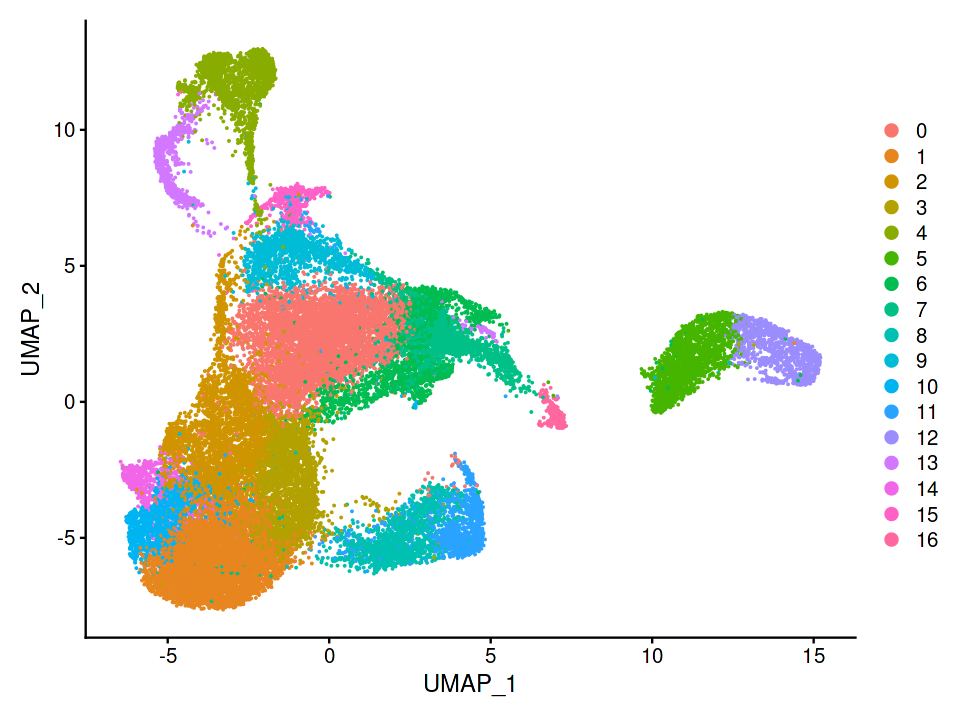

In [18]:
plot.width = 8
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "umap")
ggsave(file="results/2023-03/integration_ari_ga_org_UMAP1.pdf", width = plot.width, height = plot.height)

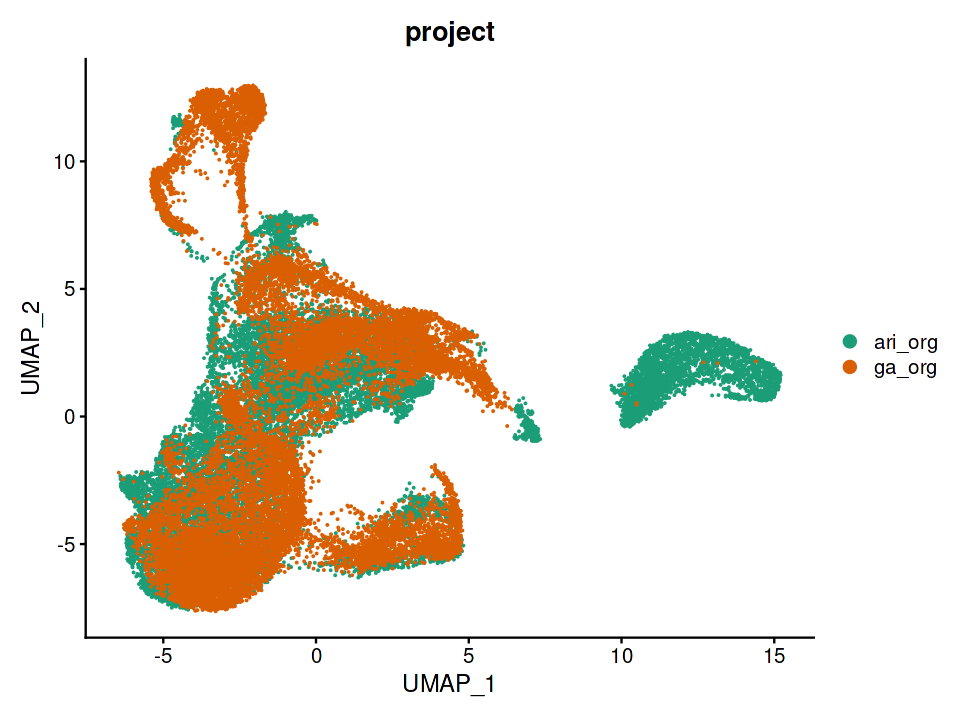

In [19]:
plot.width = 8
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "umap", group.by = "project", cols = color_palette)
ggsave(file="results/2023-03/integration_ari_ga_org_UMAP2.pdf", width = plot.width, height = plot.height)

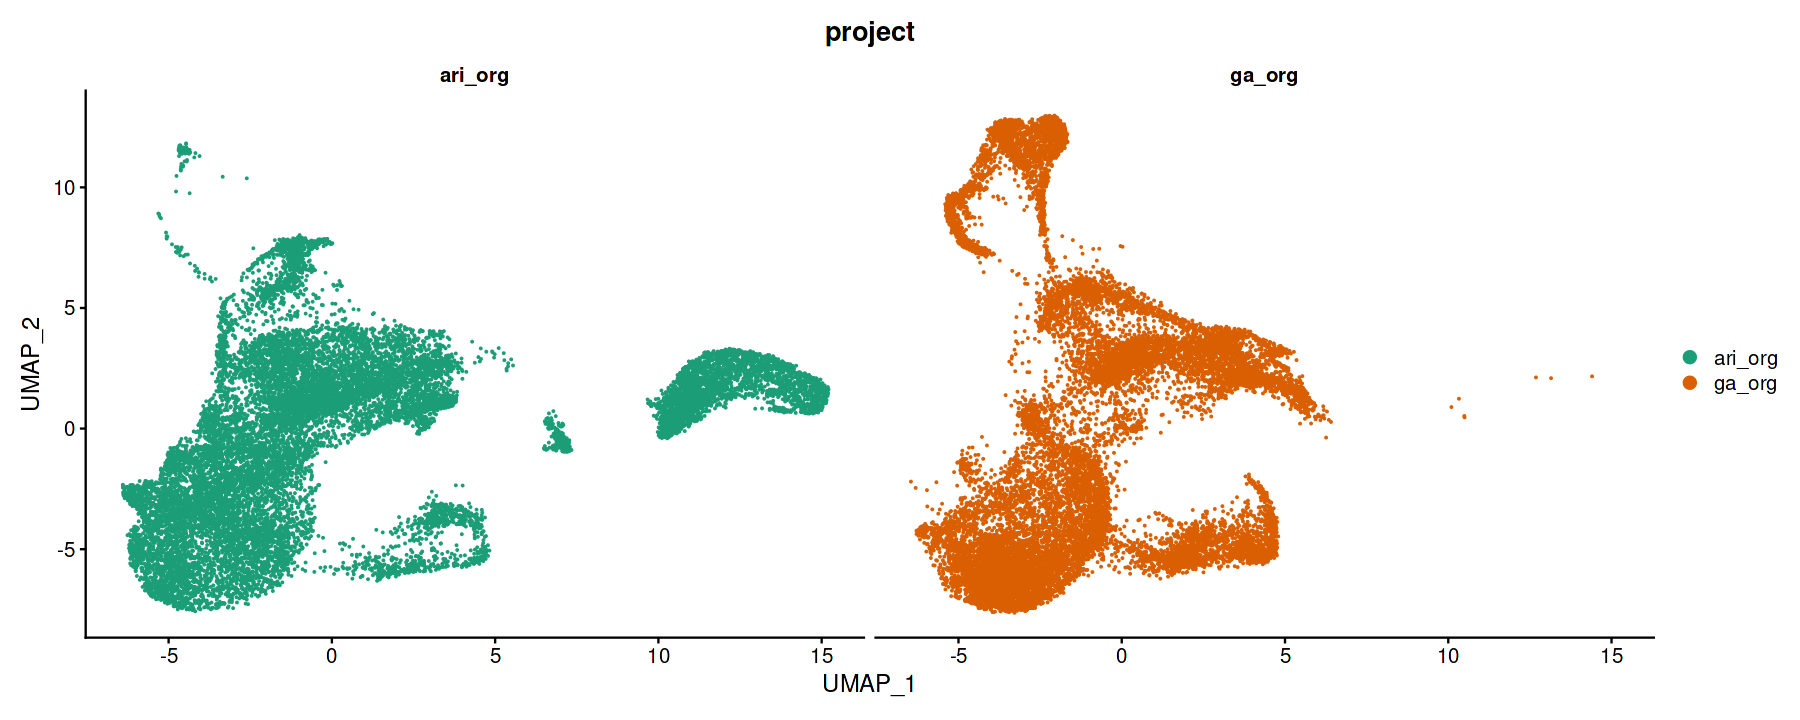

In [20]:
plot.width = 15
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "umap", group.by = "project", split.by = "project", cols = color_palette)
ggsave(file="results/2023-03/integration_ari_ga_org_UMAP3.pdf", width = plot.width, height = plot.height)

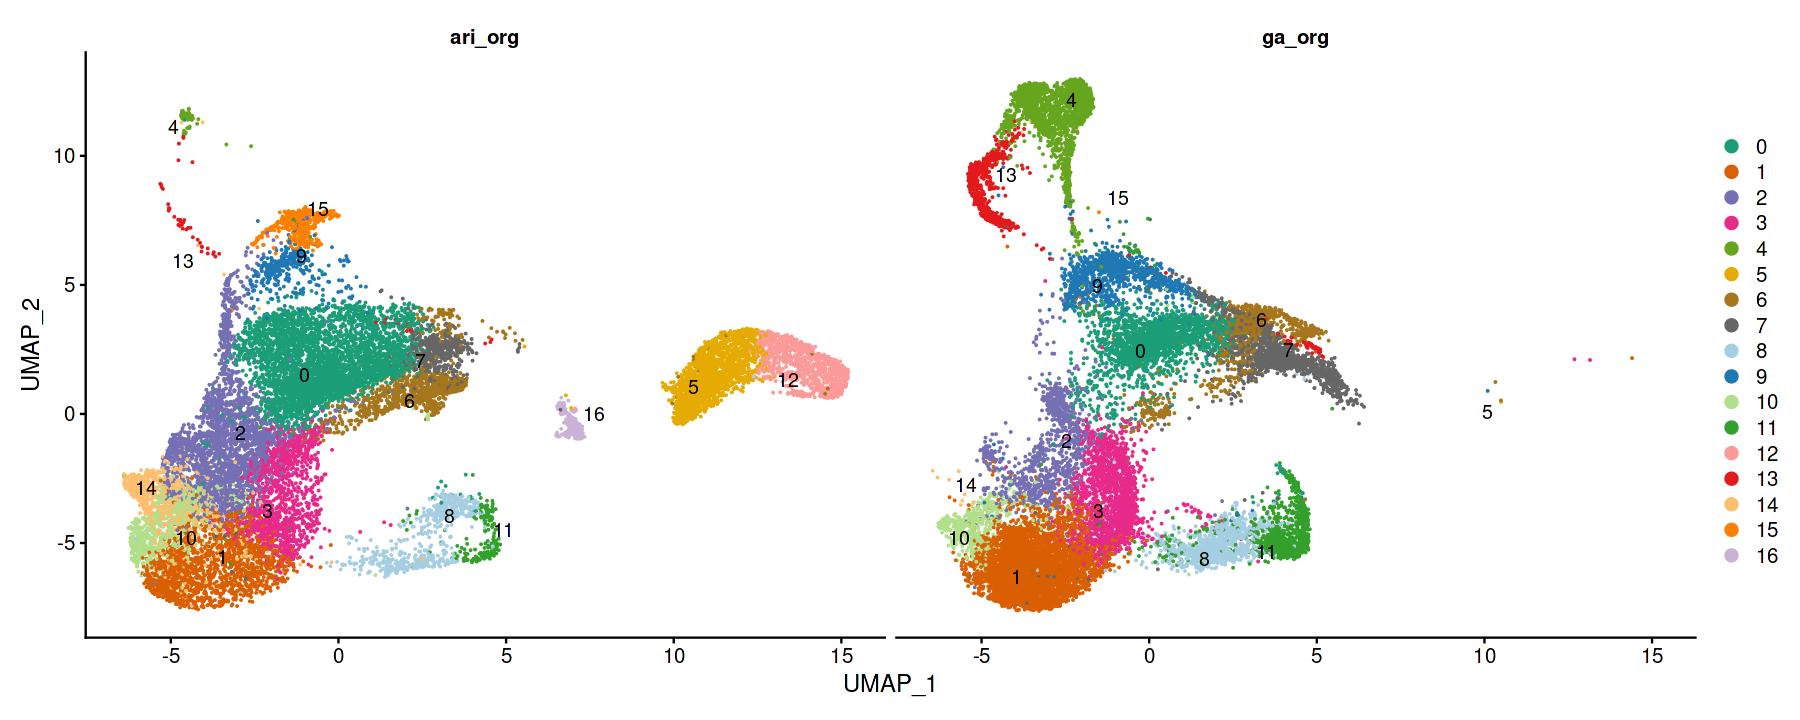

In [43]:
plot.width = 15
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "umap", split.by = "project", cols=final_color_palette,
        label = TRUE, repel = TRUE)
ggsave(file="results/2023-03/integration_ari_ga_org_UMAP4.pdf", width = plot.width, height = plot.height)

Saving 6.67 x 6.67 in image


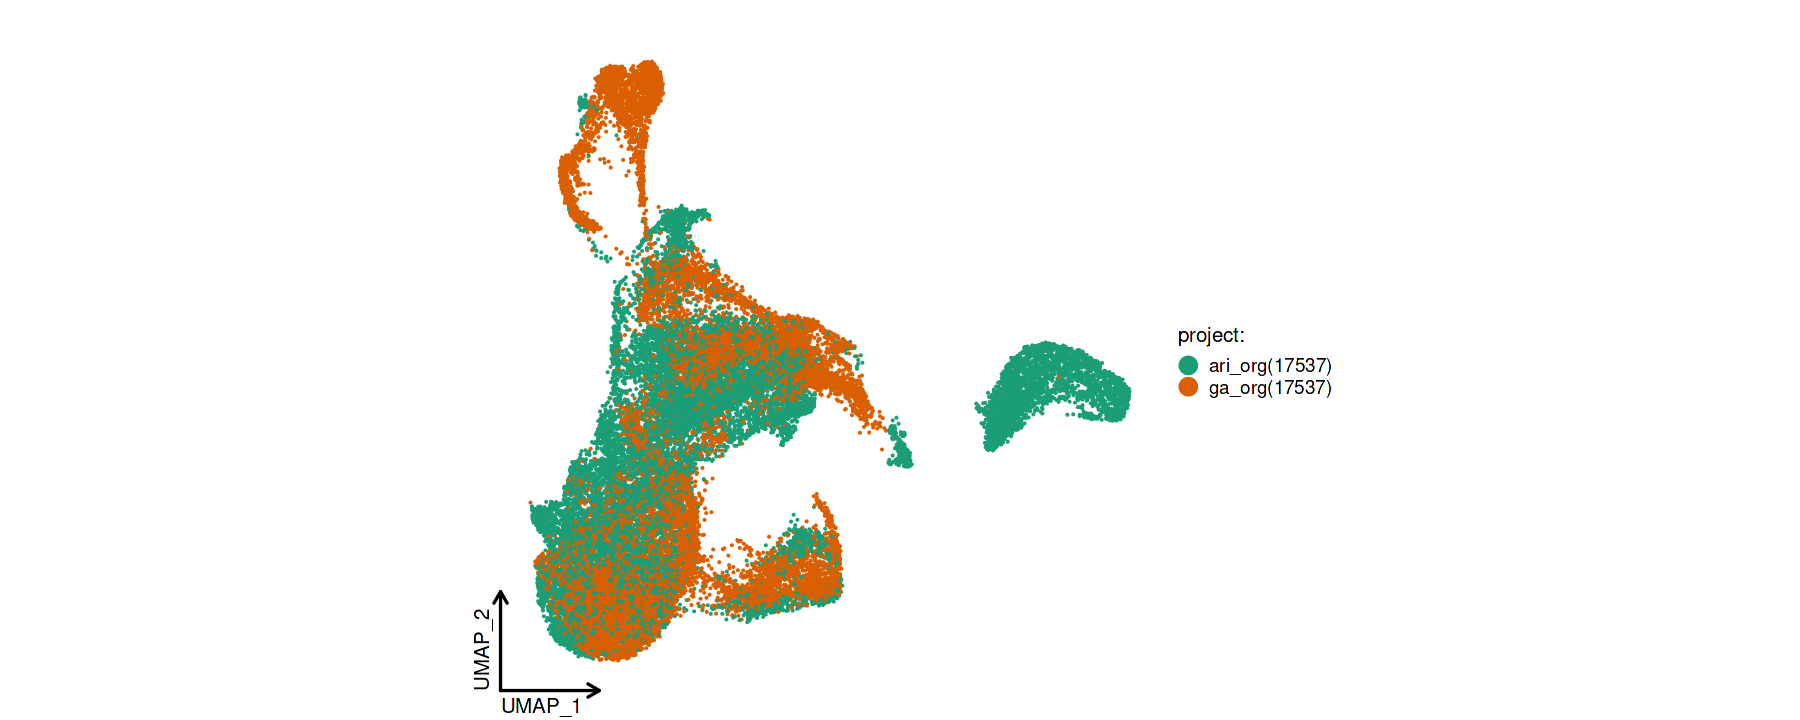

In [44]:
#plot.width = 10
#plot.height = 10
#options(repr.plot.width = plot.width, repr.plot.height = plot.height)

# Using SCP
ClassDimPlot(
  srt = so.combined.sct, group.by = "project",
  reduction = "UMAP", theme_use = "theme_blank", 
  palcolor = color_palette
)
ggsave(file="results/2023-04-28/Fig3_H_1.pdf")#, width = plot.width, height = plot.height)

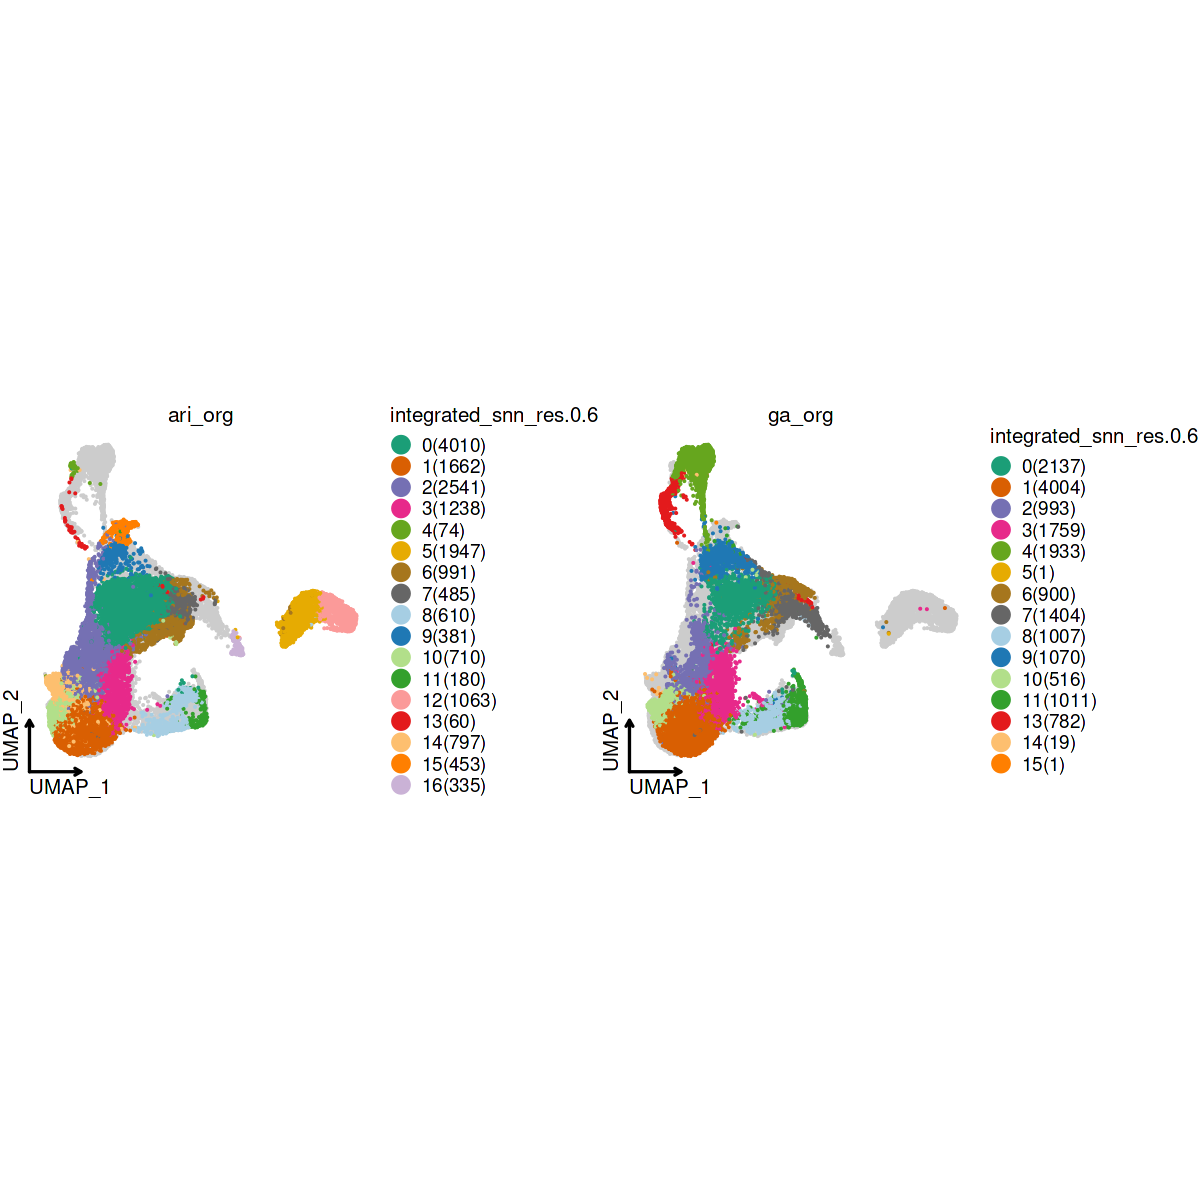

In [34]:
#plot.width = 10
#plot.height = 10
#options(repr.plot.width = plot.width, repr.plot.height = plot.height)

# Using SCP
ClassDimPlot(
  srt = so.combined.sct, group.by = "integrated_snn_res.0.6", split.by = "project", 
  reduction = "UMAP", theme_use = "theme_blank", 
  palcolor = final_color_palette
)
ggsave(file="results/2023-04-28/Fig3_H_2.pdf", width = plot.width, height = plot.height)

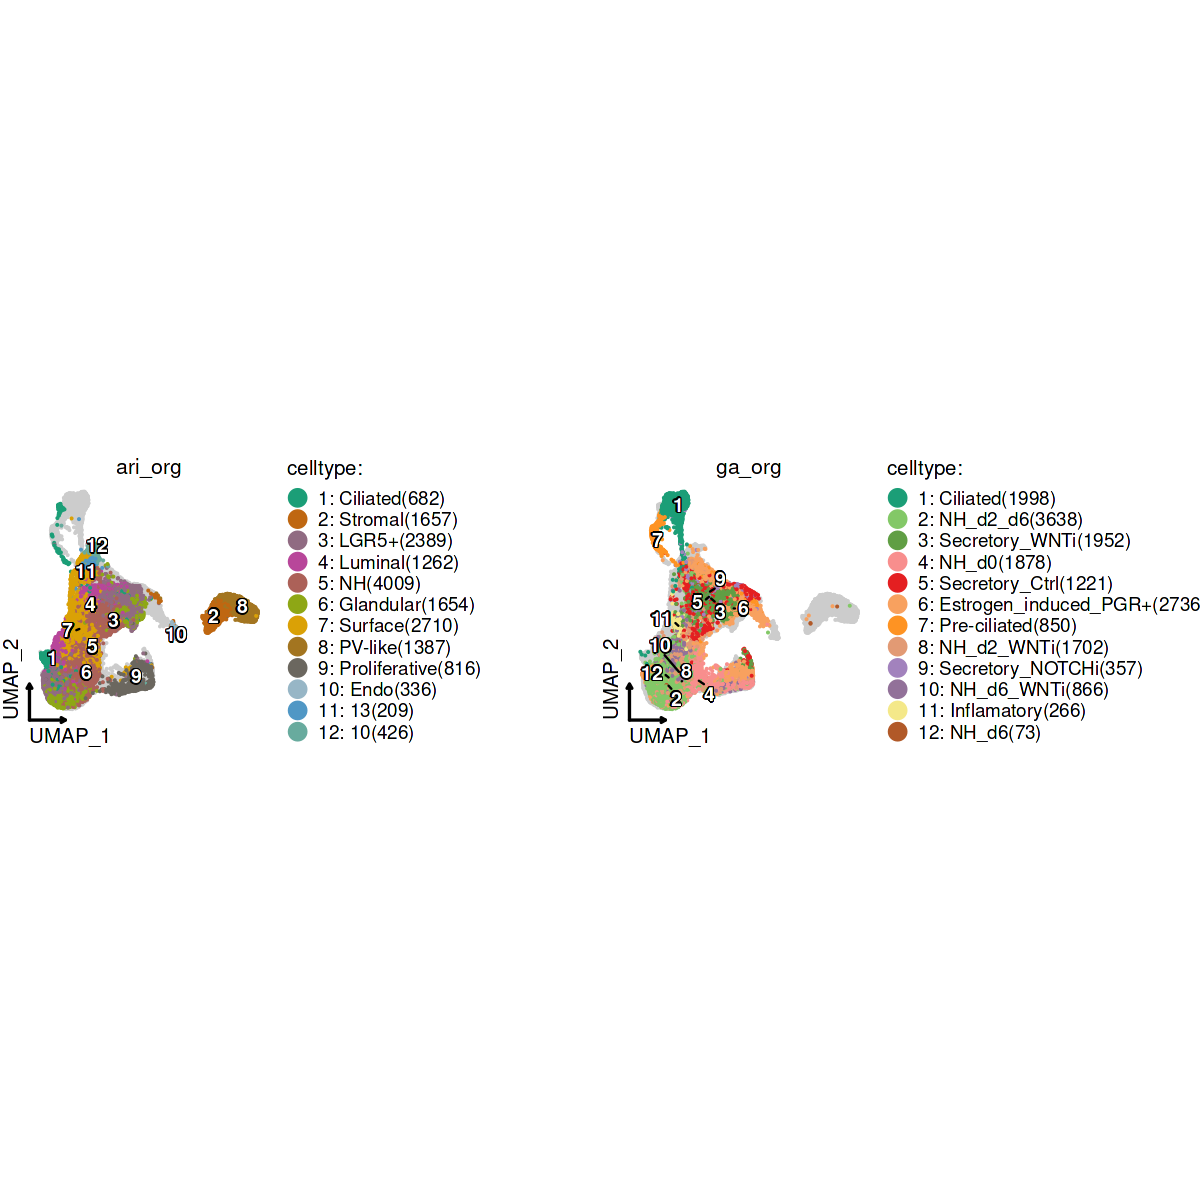

In [36]:
#plot.width = 10
#plot.height = 10
#options(repr.plot.width = plot.width, repr.plot.height = plot.height)

# Using SCP
ClassDimPlot(label = TRUE,
  srt = so.combined.sct, group.by = "celltype", split.by = "project", 
  reduction = "UMAP", theme_use = "theme_blank", 
  palcolor = final_color_palette
)
ggsave(file="results/2023-04-28/Fig3_H_3.pdf", width = plot.width, height = plot.height)

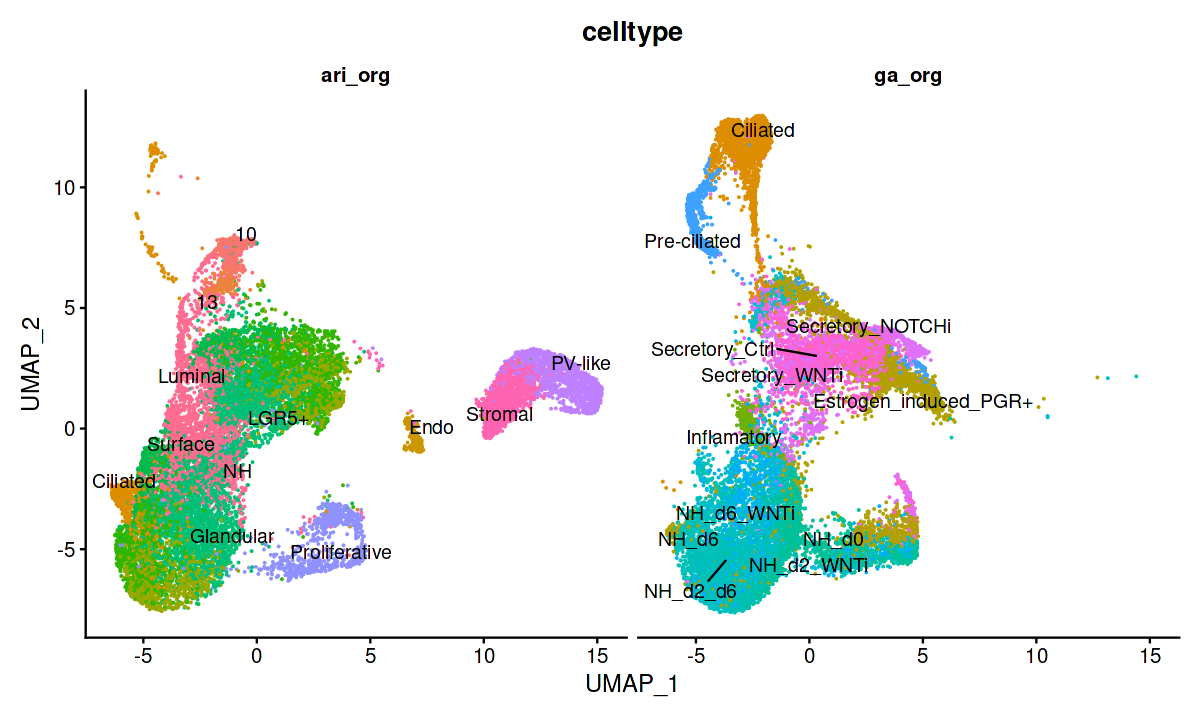

In [ ]:
plot.width = 10
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "umap", group.by = "celltype", 
        split.by = "project", label = TRUE, repel = TRUE) + NoLegend()

ggsave(file="results/2023-04-28/Fig3_H_4.pdf", width = plot.width, height = plot.height)

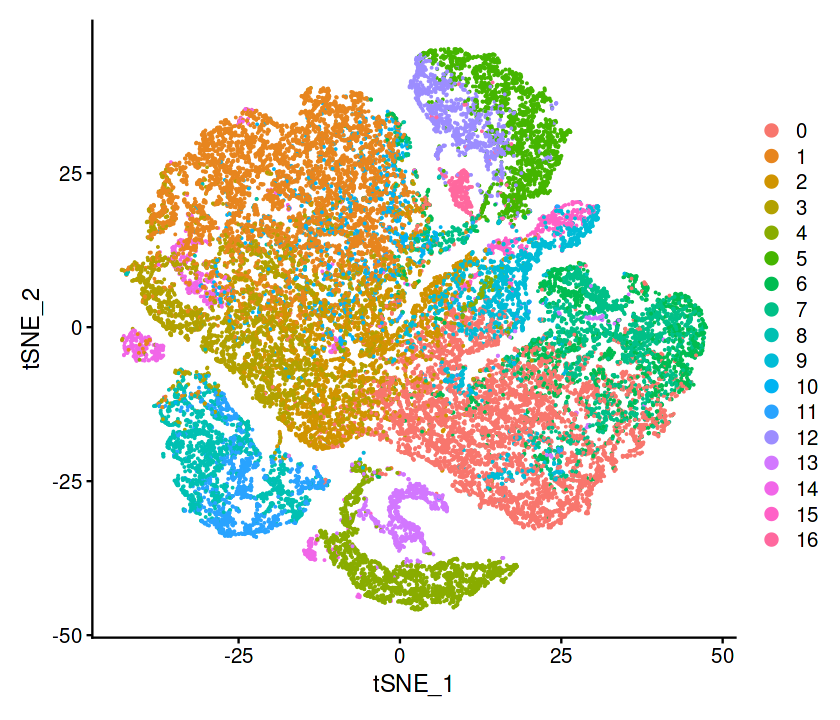

In [45]:
plot.width = 7
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "tsne")

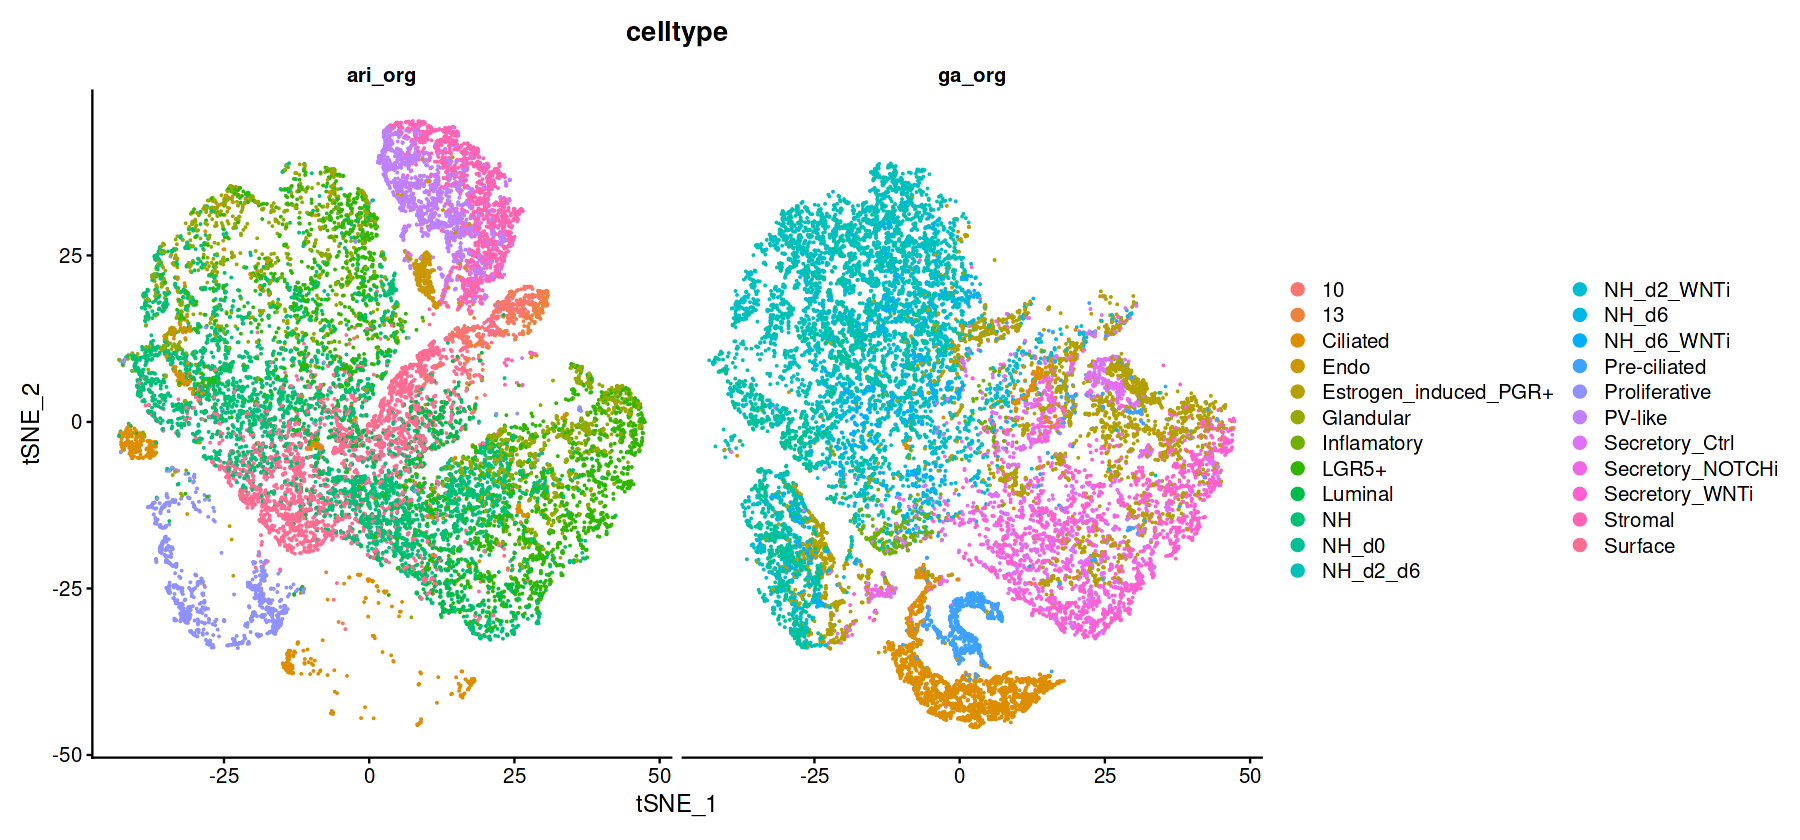

In [46]:
plot.width = 15
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "tsne", group.by = "celltype", split.by = "project")
ggsave(file="results/2023-03/integration_all_downsized_tsne2_split_by_project_with_labels1.pdf", width = plot.width, height = plot.height)

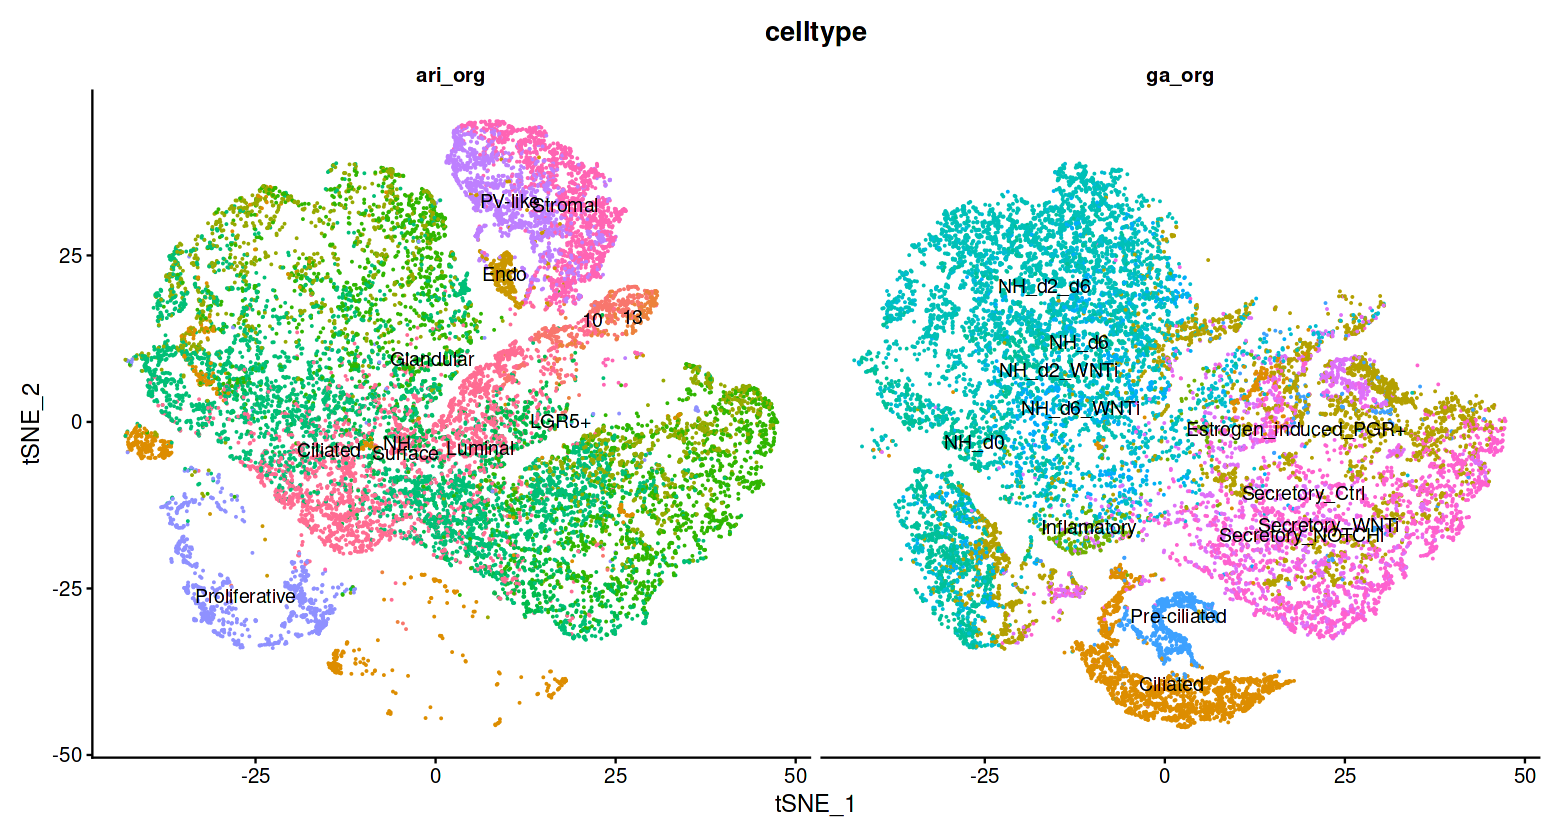

In [47]:
plot.width = 13
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "tsne", group.by = "celltype", split.by = "project", label = TRUE) + NoLegend()
ggsave(file="results/2023-03/integration_all_downsized_tsne2_split_by_project_with_labels2.pdf", width = plot.width, height = plot.height)

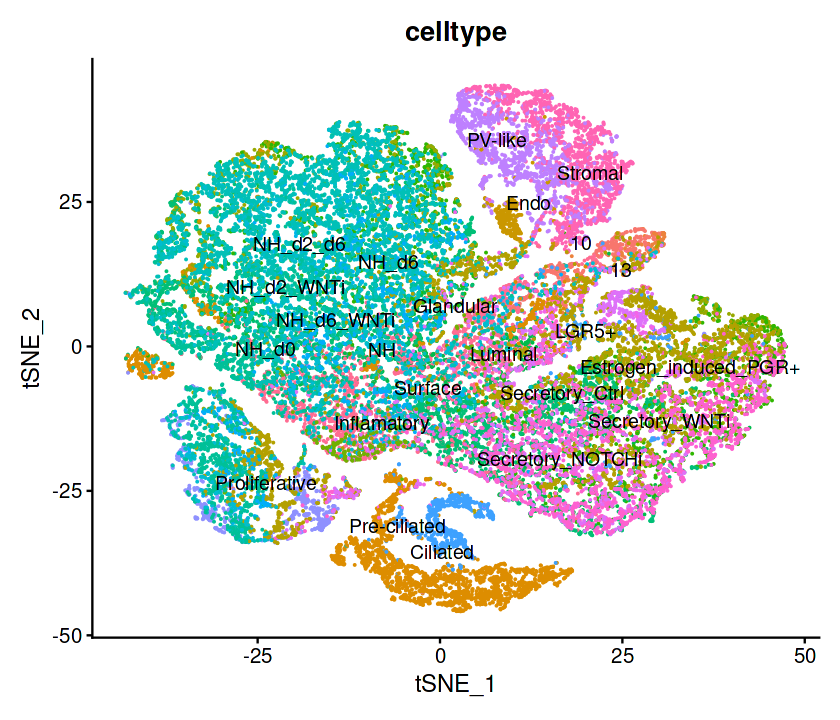

In [48]:
plot.width = 7
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so.combined.sct, reduction = "tsne", group.by = "celltype", label = TRUE, repel = TRUE) + NoLegend()
ggsave(file="results/2023-03/integration_all_downsized_tsne3_with_labels.pdf", width = plot.width, height = plot.height)

Use the HVF to calculate distance metric.

Use 1414 common features to calculate distance.

Detected query data type: unknown

Detected reference data type: log_normalized_counts

Calculate similarity...

Use 'raw' method to find neighbors.

Predict cell type...



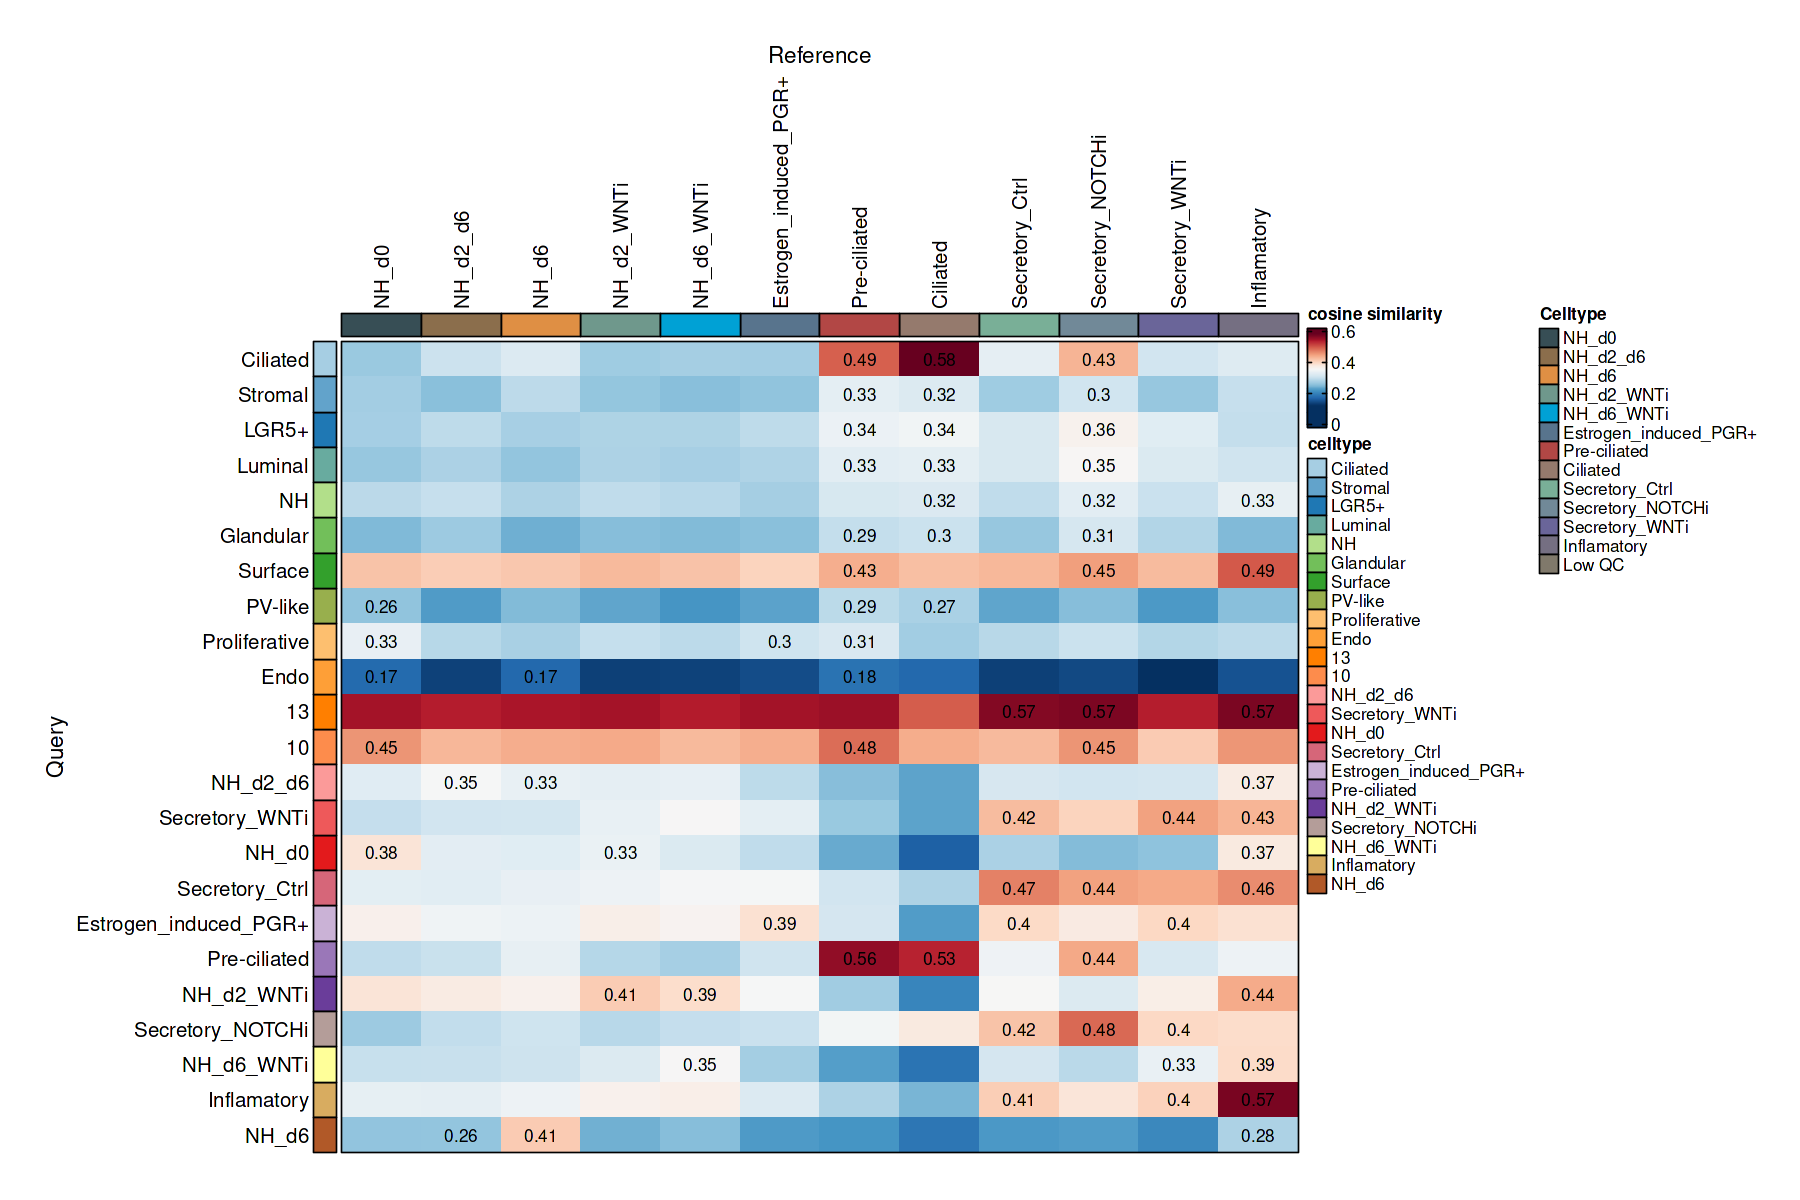

In [49]:
# Calculate score for cosine similarity
ht <- CellCorHeatmap(
  srt_query = so.combined.sct, srt_ref = ga_org.downsized,
  query_group = "celltype", ref_group = "Celltype",
  nlabel = 3, label_by = "row",
  show_row_names = TRUE, show_column_names = TRUE
)
plot.width = 15
plot.height = 10
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
print(ht$plot)
ggsave(file="results/2023-04-28/heatmap_cosine_distance_org_integrated_1.pdf", width = plot.width, height = plot.height)

### Let's compared the integrated organoids with the in vivo datasets

In [50]:
#load Wang, Nat Medicine, 2020 in vitro
wg_vv.downsized <- readRDS(file = "data/wg_vv/processed/wg_vv.downsized.rds")
wg_vv.downsized
wg_vv.downsized$project <- "wg_vv"
wg_vv.downsized$celltype <- wg_vv.downsized$cell_type
head(wg_vv.downsized@meta.data)

An object of class Seurat 
60424 features across 17537 samples within 2 assays 
Active assay: SCT (26886 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

orig.ident nCount_RNA nFeature_RNA donor day
29_TGTGATGTCCGTGACG 29          5410      2012         29    20 
58_GCAGTTATCACCTTAT 58         12110      3694         58    20 
19_CAGAGCCTCATGAGGG 19         17950      3776         19    22 
20_GTAGCTAGTGTTCGAT 20         24231      4445         20    22 
29_TTTCGATCACGCAGTC 29          4746      1825         29    20 
39_TGCTGAACACTTGAAC 39          5914      1998         39    23 
                    cell_type              cell_name          
29_TGTGATGTCCGTGACG Unciliated epithelia 1 29_TGTGATGTCCGTGACG
58_GCAGTTATCACCTTAT Stromal fibroblasts    58_GCAGTTATCACCTTAT
19_CAGAGCCTCATGAGGG Unciliated epithelia 2 19_CAGAGCCTCATGAGGG
20_GTAGCTAGTGTTCGAT Unciliated epithelia 1 20_GTAGCTAGTGTTCGAT
29_TTTCGATCACGCAGTC Unciliated epithelia 2 29_TTTCGATCACGCAGTC
39_TGCTGAACACTTGAAC Stromal fibroblasts    39_TGCTGAACACTTGAAC
                    phase_canonical     percent_mt percent_rb nCount_SCT
29_TGTGATGTCCGTGACG secretory_early-mid 15.246479  11.76056   5680      
58_GCAGTTATCACCTTAT secretory_early      3.328096  22.86816   7001      
19_CAGAGCCTCATGAGGG proliferative        6.637737  26.35808   6222      
20_GTAGCTAGTGTTCGAT secretory_mid       15.207523  11.75422   6168      
29_TTTCGATCACGCAGTC secretory_early-mid 11.009677  18.38598   5477      
39_TGCTGAACACTTGAAC secretory_early-mid  3.076923  34.09975   5915      
                    nFeature_SCT SCT_snn_res.0.1 SCT_snn_res.0.3
29_TGTGATGTCCGTGACG 2012         0               1              
58_GCAGTTATCACCTTAT 3367         1               2              
19_CAGAGCCTCATGAGGG 2178         2               9              
20_GTAGCTAGTGTTCGAT 2075         6               4              
29_TTTCGATCACGCAGTC 1825         0               0              
39_TGCTGAACACTTGAAC 1998         1               6              
                    SCT_snn_res.0.5 SCT_snn_res.0.8 seurat_clusters project
29_TGTGATGTCCGTGACG 0               1               1               wg_vv  
58_GCAGTTATCACCTTAT 2               8               8               wg_vv  
19_CAGAGCCTCATGAGGG 8               22              22              wg_vv  
20_GTAGCTAGTGTTCGAT 4               4               4               wg_vv  
29_TTTCGATCACGCAGTC 1               0               0               wg_vv  
39_TGCTGAACACTTGAAC 5               3               3               wg_vv  
                    nUMI  celltype              
29_TGTGATGTCCGTGACG  5410 Unciliated epithelia 1
58_GCAGTTATCACCTTAT 12110 Stromal fibroblasts   
19_CAGAGCCTCATGAGGG 17950 Unciliated epithelia 2
20_GTAGCTAGTGTTCGAT 24231 Unciliated epithelia 1
29_TTTCGATCACGCAGTC  4746 Unciliated epithelia 2
39_TGCTGAACACTTGAAC  5914 Stromal fibroblasts

In [51]:
#load Garcia-Alonso in vitro
ga_vv.downsized <- readRDS(file = "data/ga_vv/processed/ga_vv.downsized.rds")
ga_vv.downsized
ga_vv.downsized$project <- "ga_vv"
ga_vv.downsized$celltype <- ga_vv.downsized$Cell.type
#ga_vv.downsized$celltype <- ga_vv.downsized$Broad.cell.type
head(ga_vv.downsized@meta.data)

An object of class Seurat 
28614 features across 17537 samples within 1 assay 
Active assay: RNA (28614 features, 0 variable features)
 1 dimensional reduction calculated: umap_scvi_sampl_cc

SampleID        log2p1_count percent_mito
4861STDY7387181_TCATTACCAATGTTGC 4861STDY7387181 13.74462     0.05675774  
4861STDY7387182_CGTTAGACACTCTGTC 4861STDY7387182 12.94251     0.05831533  
4861STDY7771123_GTACTTTGTATCACCA 4861STDY7771123 12.49710     0.02145329  
MRC_Endo8625699_CACGTGGTCTTCCCGA MRC_Endo8625699 13.53625     0.08999074  
MRC_Endo8712032_ATACCGACATTGCCTC MRC_Endo8712032 14.88941     0.06797588  
GSM4577308_TGTCCACTCCGATGCG      GSM4577308      14.01907     0.04047949  
                                 n_genes DonorID      BiopsyType        
4861STDY7387181_TCATTACCAATGTTGC 4237    A13          Organ_Donor       
4861STDY7387182_CGTTAGACACTCTGTC 2502    A13          Organ_Donor       
4861STDY7771123_GTACTTTGTATCACCA 2134    A30          Organ_Donor       
MRC_Endo8625699_CACGTGGTCTTCCCGA 3079    E1           Superficial_Biopsy
MRC_Endo8712032_ATACCGACATTGCCTC 5451    E2           Superficial_Biopsy
GSM4577308_TGTCCACTCCGATGCG      3555    SAMN15049049 Superficial_Biopsy
                                 Location             Binary.Stage 
4861STDY7387181_TCATTACCAATGTTGC endometrium_enriched Proliferative
4861STDY7387182_CGTTAGACACTCTGTC endometrium_enriched Proliferative
4861STDY7771123_GTACTTTGTATCACCA endometrium_enriched Secretory    
MRC_Endo8625699_CACGTGGTCTTCCCGA endometrium_biopsy   Secretory    
MRC_Endo8712032_ATACCGACATTGCCTC endometrium_biopsy   Secretory    
GSM4577308_TGTCCACTCCGATGCG      endometrium_biopsy   Secretory    
                                 Stage           Broad.cell.type
4861STDY7387181_TCATTACCAATGTTGC proliferative   Stromal        
4861STDY7387182_CGTTAGACACTCTGTC proliferative   Stromal        
4861STDY7771123_GTACTTTGTATCACCA early-secretory Endothelial    
MRC_Endo8625699_CACGTGGTCTTCCCGA late-secretory  Stromal        
MRC_Endo8712032_ATACCGACATTGCCTC mid-secretory   Stromal        
GSM4577308_TGTCCACTCCGATGCG      mid-secretory   Stromal        
                                 Cell.type         CellCycle.Phase project
4861STDY7387181_TCATTACCAATGTTGC eS                G2M             ga_vv  
4861STDY7387182_CGTTAGACACTCTGTC eS                G1              ga_vv  
4861STDY7771123_GTACTTTGTATCACCA Endothelial ACKR1 G1              ga_vv  
MRC_Endo8625699_CACGTGGTCTTCCCGA eS                G1              ga_vv  
MRC_Endo8712032_ATACCGACATTGCCTC eS                G1              ga_vv  
GSM4577308_TGTCCACTCCGATGCG      dS                G1              ga_vv  
                                 nCount_RNA nFeature_RNA celltype         
4861STDY7387181_TCATTACCAATGTTGC 13725      4237         eS               
4861STDY7387182_CGTTAGACACTCTGTC  7871      2502         eS               
4861STDY7771123_GTACTTTGTATCACCA  5780      2134         Endothelial ACKR1
MRC_Endo8625699_CACGTGGTCTTCCCGA 11879      3079         eS               
MRC_Endo8712032_ATACCGACATTGCCTC 30349      5451         eS               
GSM4577308_TGTCCACTCCGATGCG      16601      3555         dS

In [52]:
table(ga_vv.downsized$celltype)


              SOX9            Lumenal          Glandular           Ciliated 
               971               2682               2625                736 
          Lymphoid            Myeloid  Endothelial ACKR1 Endothelial SEMA3G 
               312                150                880                 58 
          PV MYH11          PV STEAP4               uSMC      Fibroblast C7 
               170                419                156                 43 
                eS                 dS              Other 
              3097               4885                353 

In [53]:
table(wg_vv.downsized$celltype)


              Ciliated             Endothelia            Lymphocytes 
                   871                    453                    676 
           Macrophages    Smooth muscle cells    Stromal fibroblasts 
                   109                    294                   5770 
Unciliated epithelia 1 Unciliated epithelia 2 
                  5064                   4300 

In [54]:
ga_vv.downsized2 <- subset(x = ga_vv.downsized, subset = celltype == c("SOX9", "Lumenal", "Glandular", "Ciliated"))

In [55]:
wg_vv.downsized2 <- subset(x = wg_vv.downsized, subset = celltype == c("Ciliated", "Unciliated epithelia 1", "Unciliated epithelia 2"))

Use the HVF to calculate distance metric.

Use 986 common features to calculate distance.

Detected query data type: unknown

Detected reference data type: log_normalized_counts

Calculate similarity...

Use 'raw' method to find neighbors.

Predict cell type...



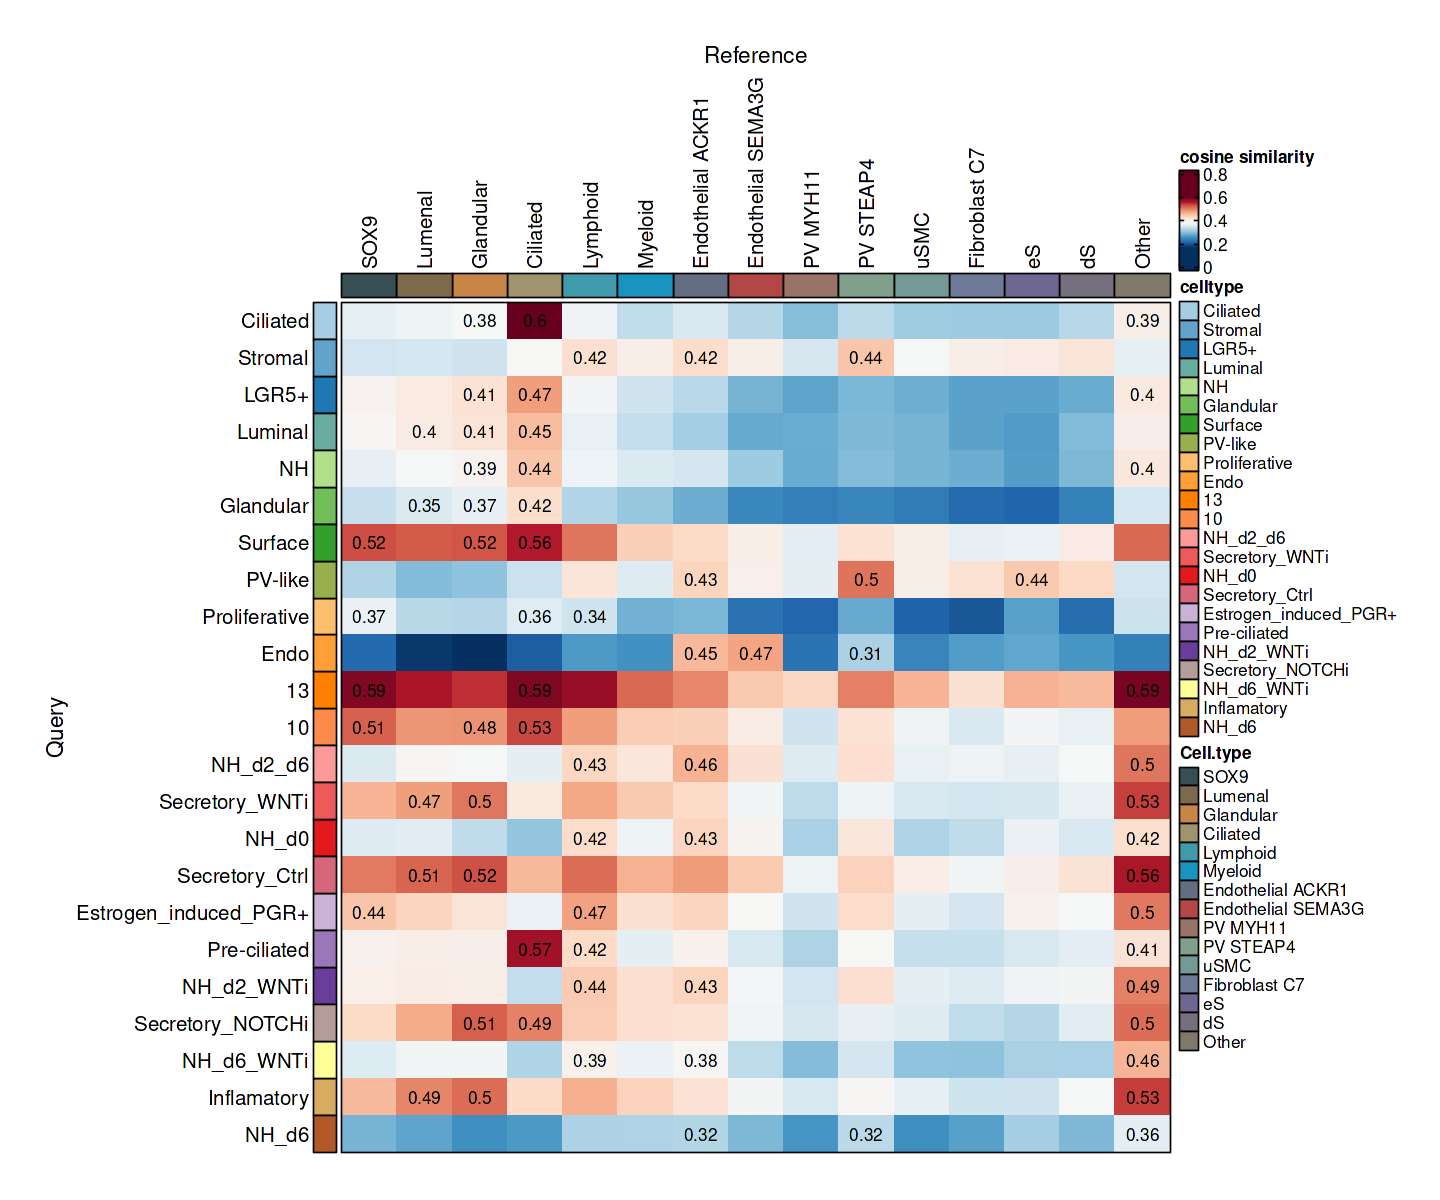

In [56]:
# Calculate score for cosine similarity
ht <- CellCorHeatmap(
  srt_query = so.combined.sct, srt_ref = ga_vv.downsized,
  query_group = "celltype", ref_group = "Cell.type",
  nlabel = 3, label_by = "row",
  show_row_names = TRUE, show_column_names = TRUE
)
plot.width = 12
plot.height = 10
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
print(ht$plot)
#ggsave(file="results/2023-03/heatmap_cosine_distance_org_integrated_1.pdf", width = plot.width, height = plot.height)

# Only epithelial cells

Use the HVF to calculate distance metric.

Use 1076 common features to calculate distance.

Detected query data type: unknown

Detected reference data type: log_normalized_counts

Calculate similarity...

Use 'raw' method to find neighbors.

Predict cell type...



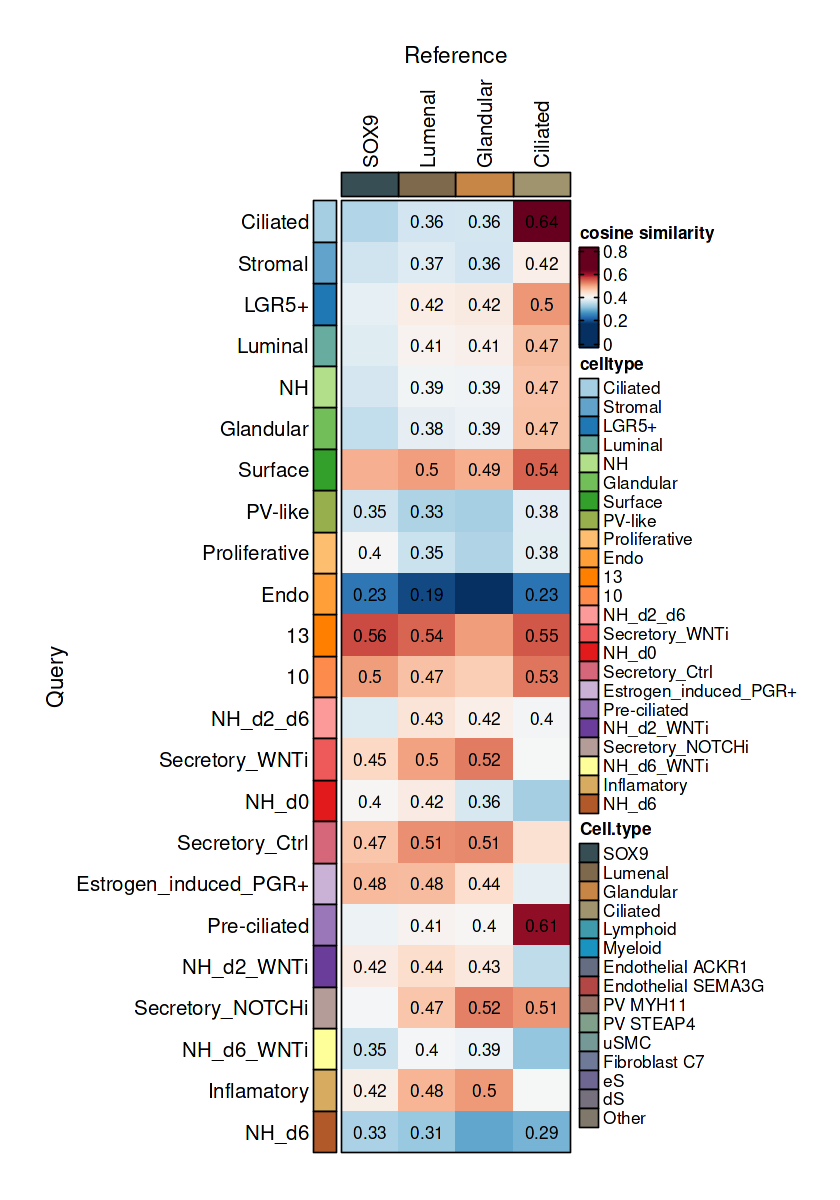

In [57]:
# Calculate score for cosine similarity
ht <- CellCorHeatmap(
  srt_query = so.combined.sct, srt_ref = ga_vv.downsized2,
  query_group = "celltype", ref_group = "Cell.type",
  nlabel = 3, label_by = "row",
  show_row_names = TRUE, show_column_names = TRUE
)
plot.width = 7
plot.height = 10
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
print(ht$plot)
ggsave(file="results/2023-04-28/Fig3_I_ga_vv_1.pdf", width = plot.width, height = plot.height)

Use the HVF to calculate distance metric.

Use 1299 common features to calculate distance.

Detected query data type: unknown

Detected reference data type: log_normalized_counts

Calculate similarity...

Use 'raw' method to find neighbors.

Predict cell type...



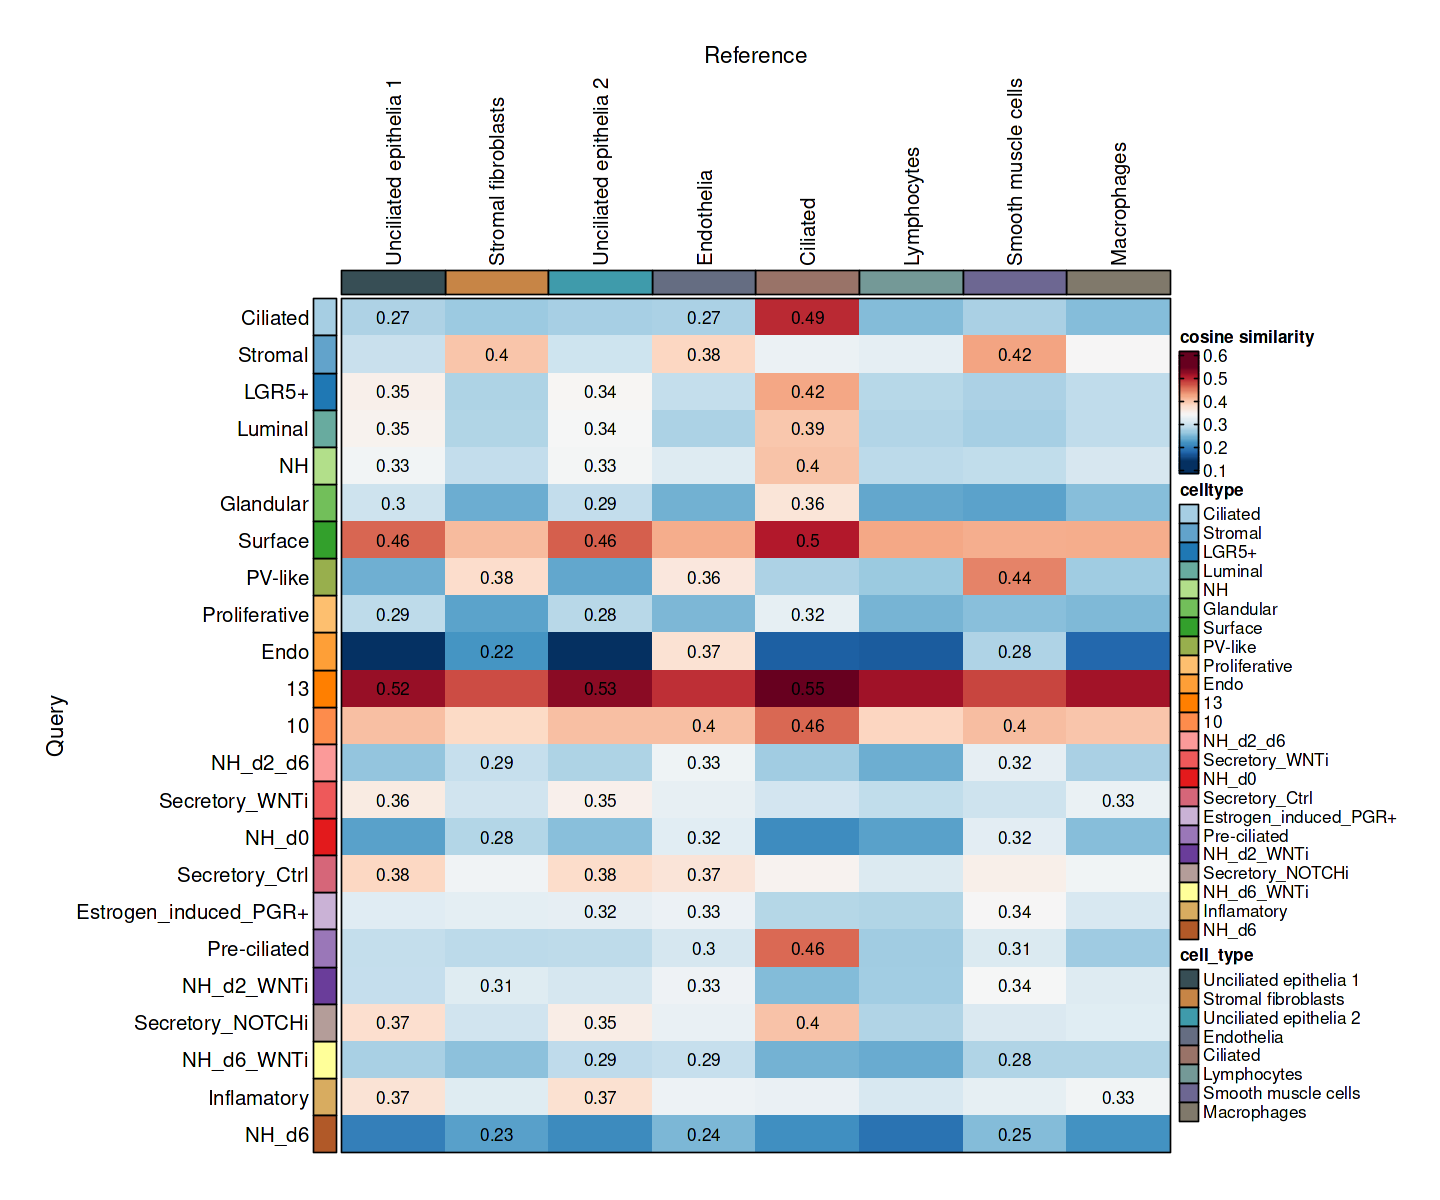

In [58]:
# Calculate score for cosine similarity for Wang in vivo
ht <- CellCorHeatmap(
  srt_query = so.combined.sct, srt_ref = wg_vv.downsized,
  query_group = "celltype", ref_group = "cell_type",
  nlabel = 3, label_by = "row",
  show_row_names = TRUE, show_column_names = TRUE
)
plot.width = 12
plot.height = 10
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
print(ht$plot)
#ggsave(file="results/2023-03/heatmap_cosine_distance_org_integrated_1.pdf", width = plot.width, height = plot.height)

Use the HVF to calculate distance metric.

Use 1299 common features to calculate distance.

Detected query data type: unknown

Detected reference data type: log_normalized_counts

Calculate similarity...

Use 'raw' method to find neighbors.

Predict cell type...



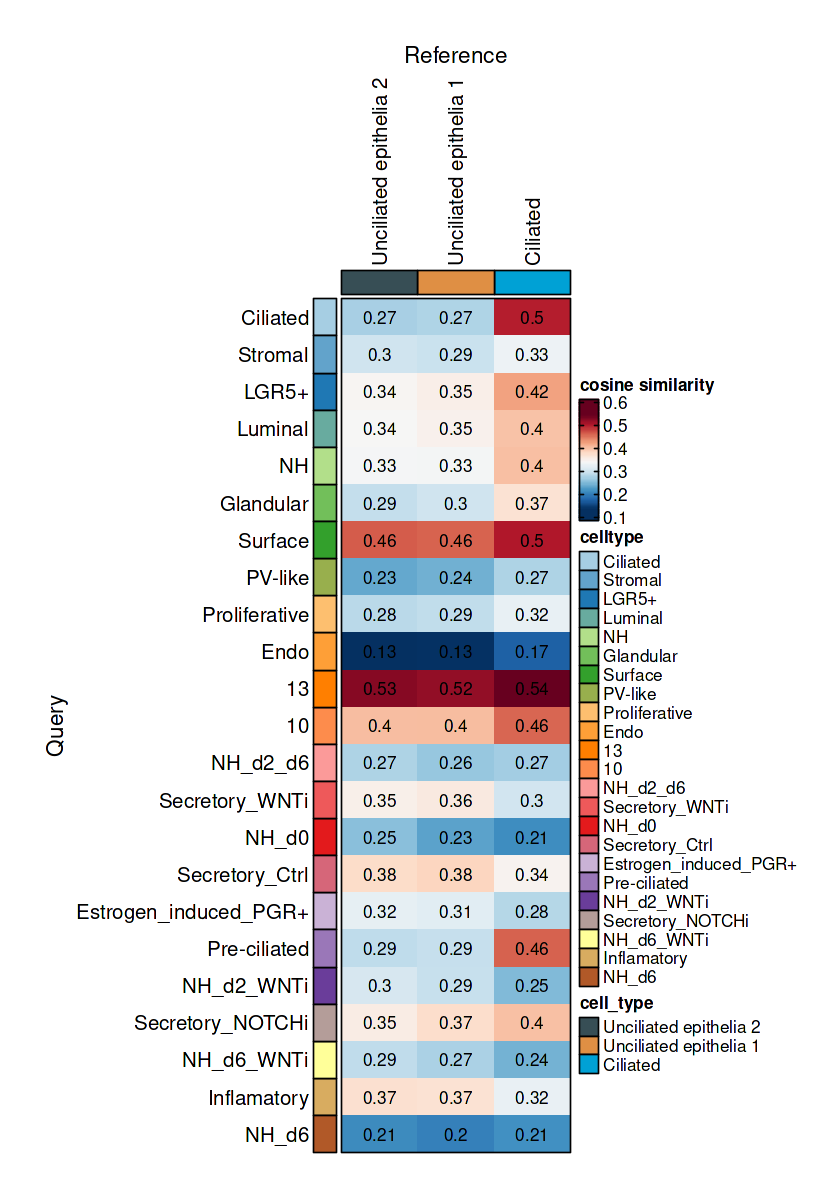

In [59]:
# Calculate score for cosine similarity for Wang in vivo
ht <- CellCorHeatmap(
  srt_query = so.combined.sct, srt_ref = wg_vv.downsized2,
  query_group = "celltype", ref_group = "cell_type",
  nlabel = 3, label_by = "row",
  show_row_names = TRUE, show_column_names = TRUE
)
plot.width = 7
plot.height = 10
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
print(ht$plot)
ggsave(file="results/2023-04-28/Fig3_I_wg_vv_1.pdf", width = plot.width, height = plot.height)

In [60]:
table(so.combined.sct$integrated_snn_res.0.6)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6147 5666 3534 2997 2007 1948 1891 1889 1617 1451 1226 1191 1063  842  816  454 
  16 
 335 

In [61]:
# Include the clustering profile into a new column

# previously defined
#so.combined.sct$clusters <- so.combined.sct$integrated_snn_res.0.6

In [62]:
markers = c("EPCAM", "SOX9", "MMP7",             #SOX9
            "LGR5", "PTGS1",                     #Lumenal
            "SCGB2A2", "SLC18A2", "PAEP",        #Glandular
            "FOXJ1", "PIFO",                     #Ciliated
            "ACTA2", "MYH11", "LEFTY2", "ACTG2", #uSMC
            "RGS5", "NTRK2", "FHL5",             #PV MYH11
            "GUCY1A2", "STEAP4", "IGF1", "PCOLCE", #PV STEAP4
            "C7", "OGN",                         #Fibroblast C7
            "MMP11", "SFRP1",                    #eS
            "DKK1", "FOXO1",                     #dS
            "CD34", "SEMA3G", "GJA5",            #Endothelial artery
            "ACKR1", "PLVAP",                    #Endothelial vein
            "PTPRC", "CD3G", "NCAM1",             #Lymphoid
            "CD14", "CSF1R")                     #Myeloid

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



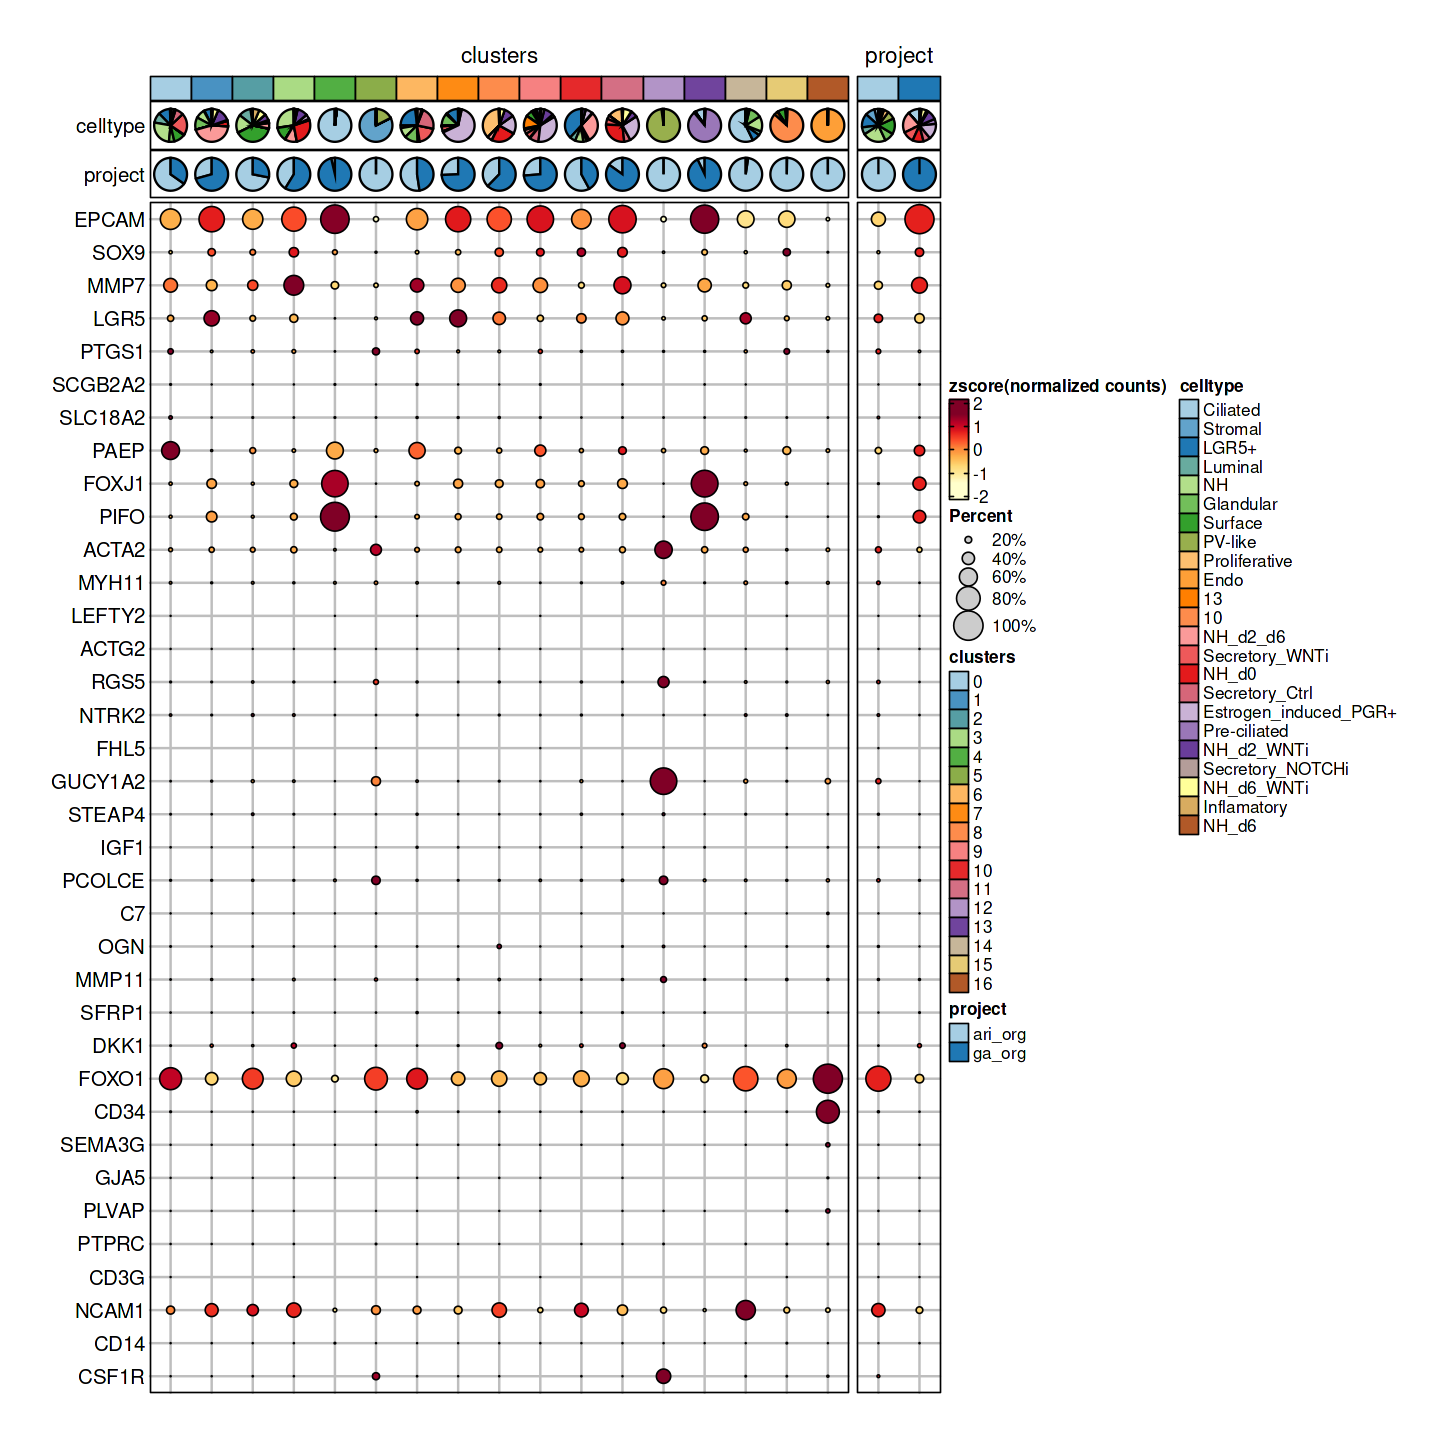

In [63]:
ht <- GroupHeatmap(
  srt = so.combined.sct,
  features = markers,
  group.by = c("clusters", "project"),
  heatmap_palette = "YlOrRd",
  cell_annotation = c("celltype", "project"),
  #cell_annotation_palette = c("Dark2", "Paired"),
  show_row_names = TRUE, row_names_side = "left",
  add_dot = TRUE, add_reticle = TRUE
)

plot.width = 12
plot.height = 12
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
print(ht$plot)

In [64]:
markers2 = c("EPCAM", "SOX9", "MMP7",             #SOX9
            "LGR5", "PTGS1",                     #Lumenal
             "PAEP",        #Glandular   "SCGB2A2", "SLC18A2",
            "FOXJ1", "PIFO",                     #Ciliated
            "ACTA2", "MYH11", #uSMC  "LEFTY2", "ACTG2",
            "RGS5",              #PV MYH11 "NTRK2", "FHL5",
            "GUCY1A2", "PCOLCE", #PV STEAP4 "STEAP4", "IGF1", 
            #"C7", "OGN",                         #Fibroblast C7
            #"MMP11", "SFRP1",                    #eS
            "DKK1", "FOXO1",                     #dS
            "CD34", "SEMA3G",            #Endothelial artery "GJA5", 
            "ACKR1", "PLVAP",                    #Endothelial vein
             "NCAM1",             #Lymphoid "PTPRC", "CD3G", 
             "CSF1R")                     #Myeloid "CD14",

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



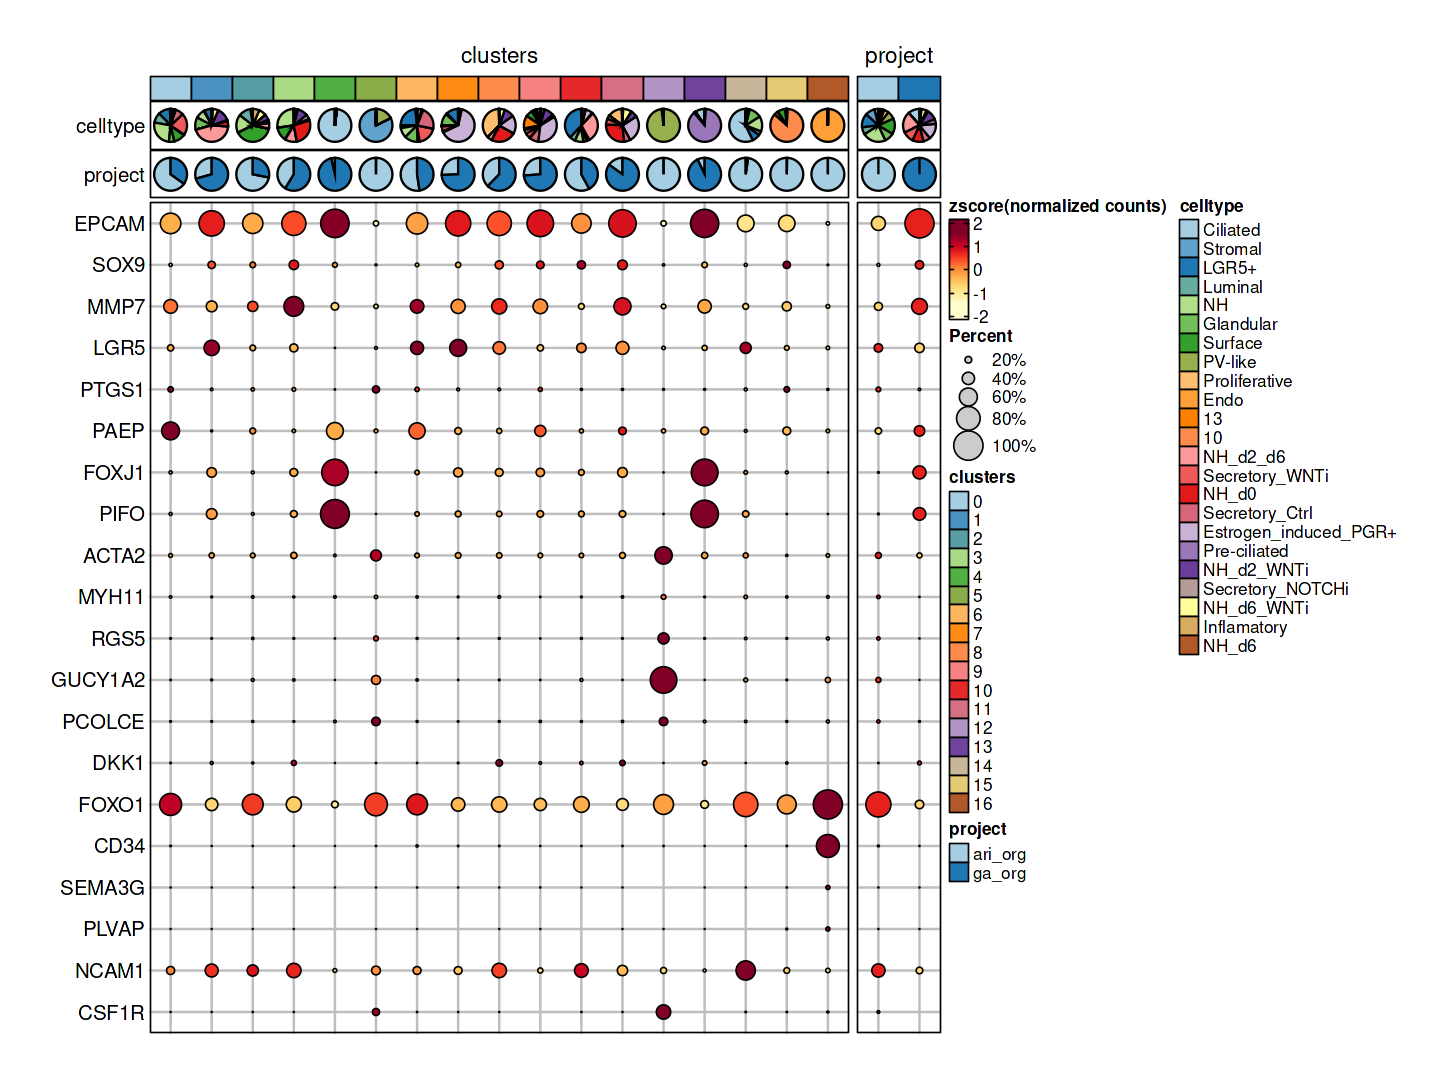

In [67]:
ht <- GroupHeatmap(
  srt = so.combined.sct,
  features = markers2,
  group.by = c("clusters", "project"),
  heatmap_palette = "YlOrRd",
  cell_annotation = c("celltype", "project"),
  #cell_annotation_palette = c("Dark2", "Paired"),
  show_row_names = TRUE, row_names_side = "left",
  add_dot = TRUE, add_reticle = TRUE
)

plot.width = 12
plot.height = 9
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
print(ht$plot)
ggsave(file="results/2023-04-28/dotplot_org_1.pdf", width = plot.width, height = plot.height)

In [68]:
# Save current integrated object
saveRDS(so.combined.sct, file = "results/2023-04-28/Ari_GA_org_only_integrated.rds")

# Save the entire workspace
save.image(file = "results/2023-04-28/Ari_GA_org_only_integrated.RData")

In [69]:
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-3    dplyr_1.1.1           SCP_0.2.7            
 [4] Matrix_1.5-3          cowplot_1.1.1         ggplot2_3.4.1        
 [7] patchwork_1.1.2       SeuratDisk_0.0.0.9020 SeuratObject_4.1.3   
[10] Seurat_4.3.0         

loaded via a namespace (and not attached):
  [1] utf8_1.2.3         